## Assessment for CASA0002 – Urban Simulation

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

### Part 1: London’s underground resilience

### I. Topological network

#### Constructing the networks

In [2]:
# Load the graphml file for London's underground
G = nx.read_graphml('london_graph.xml')

In [3]:
G1=G.copy()

In [4]:
type(G1)

networkx.classes.graph.Graph

In [5]:
print(nx.info(G1))

Graph with 401 nodes and 467 edges


In [6]:
# To check node attributes:
list(G1.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [7]:
# since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G1.nodes():
    G1.nodes[node]['coords'] = eval(G1.nodes[node]['coords'])
    

In [8]:
# To check node attributes:
list(G1.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [9]:
# To check edges attributes:
list(G1.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

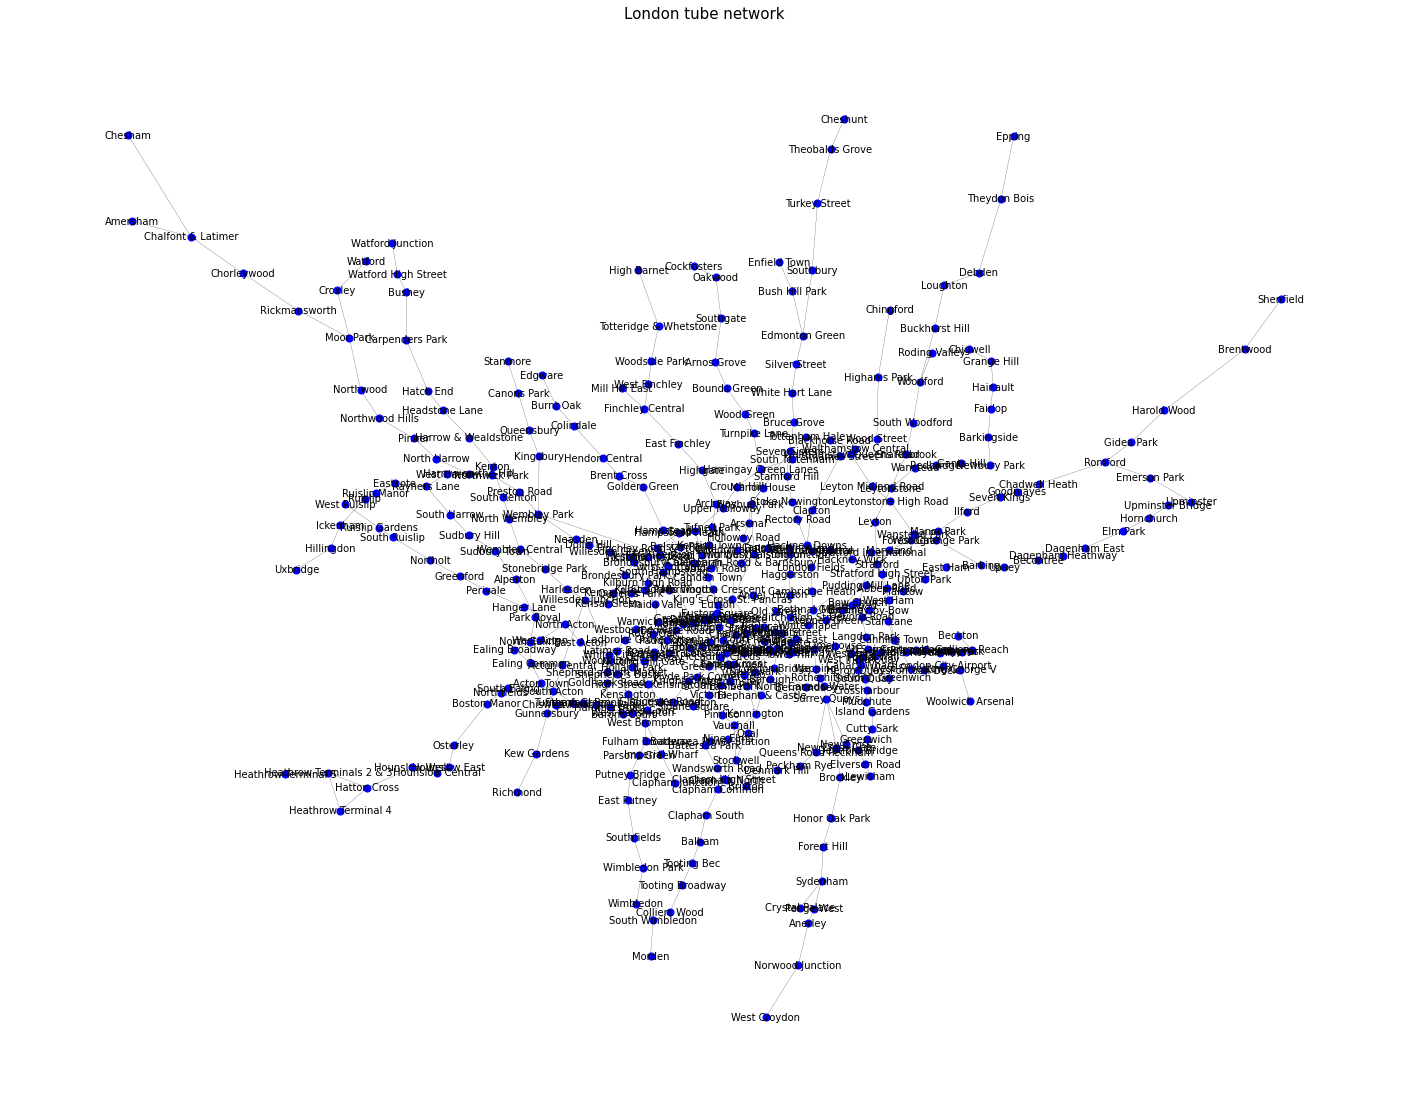

In [10]:
# Plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

#node_labels = nx.get_node_attributes(G1, 'station_name')

pos = nx.get_node_attributes(G1, 'coords')

nx.draw_networkx_nodes(G1,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G1,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G1,pos, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [11]:
#We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G1)
df[0:10]

,source,target,flows,line_name,length
0,Wembley Park,Kingsbury,12356,Jubilee,2916.771558
1,Wembley Park,Neasden,6744,Jubilee,2353.165938
2,Wembley Park,Preston Road,36601,Metropolitan,1419.735166
3,Wembley Park,Finchley Road,55216,Metropolitan,7266.373927
4,Kingsbury,Queensbury,9419,Jubilee,1245.995234
5,Queensbury,Canons Park,6385,Jubilee,1693.307343
6,Canons Park,Stanmore,3624,Jubilee,1419.669476
7,Stratford,West Ham,91801,Jubilee,1673.509515
8,Stratford,Mile End,12010,Central,2805.001392
9,Stratford,Leyton,56082,Central,2131.342926


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     467 non-null    object 
 1   target     467 non-null    object 
 2   flows      467 non-null    int64  
 3   line_name  467 non-null    object 
 4   length     467 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 18.4+ KB


#### 1.1 Centrality measures:

##### Degree Centrality on nodes:

In [13]:
?nx.degree_centrality

Signature: nx.degree_centrality(G)
Docstring:
Compute the degree centrality for nodes.

The degree centrality for a node v is the fraction of nodes it
is connected to.

Parameters
----------
G : graph
  A networkx graph

Returns
-------
nodes : dictionary
   Dictionary of nodes with degree centrality as the value.

See Also
--------
betweenness_centrality, load_centrality, eigenvector_centrality

Notes
-----
The degree centrality values are normalized by dividing by the maximum
possible degree in a simple graph n-1 where n is the number of nodes in G.

For multigraphs or graphs with self loops the maximum degree might
be higher than n-1 and values of degree centrality greater than 1
are possible.
File:      /opt/anaconda3/lib/python3.8/site-packages/networkx/algorithms/centrality/degree_alg.py
Type:      function


In [14]:
# We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G1)
nx.set_node_attributes(G1,dict(deg_london),'degree')

In [15]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G1.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(G1, 'degree'))


df_sorted_deg = df.sort_values(["degree"], ascending=False)
df_sorted_deg[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


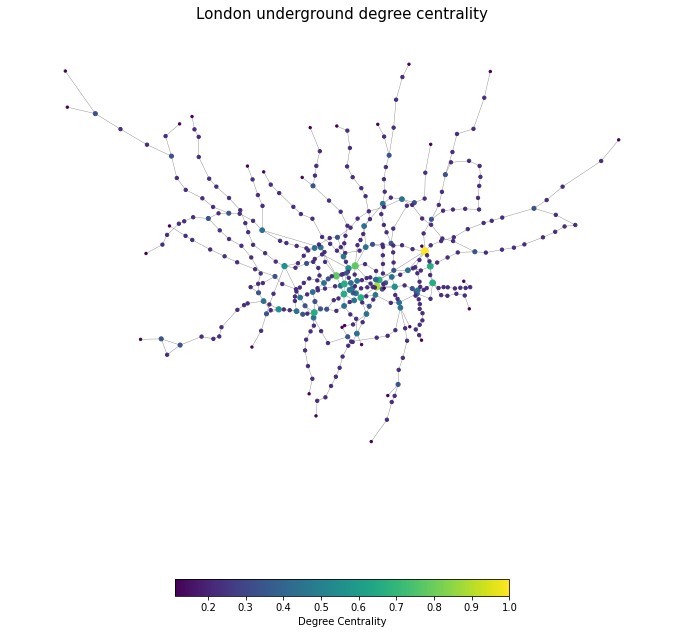

In [16]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G1.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G1.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G1.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G1, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G1,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

##### Betweenness Centrality on nodes:

In [17]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G1, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G1,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G1.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G1, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G1, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


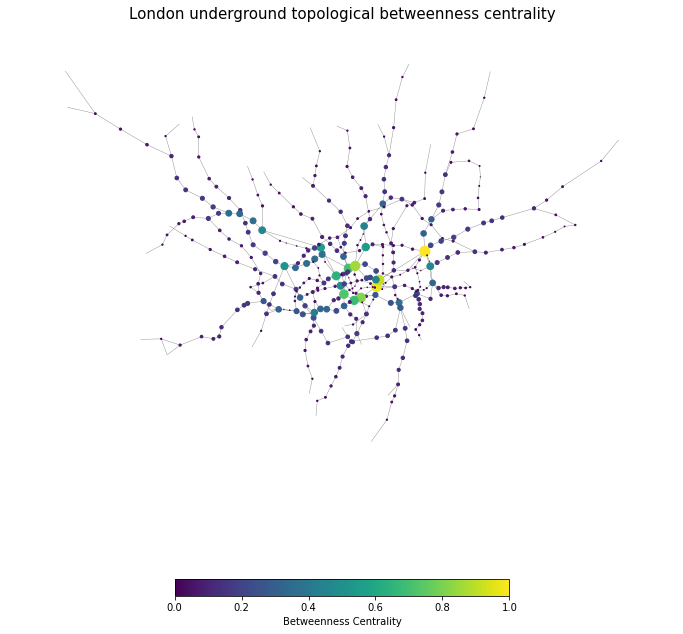

In [18]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G1.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G1.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G1.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G1, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G1, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological betweenness centrality",fontsize=15)
plt.show()

##### Closeness Centrality:

In [19]:
clos_t=nx.closeness_centrality(G1)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G1,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G1.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G1, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G1, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


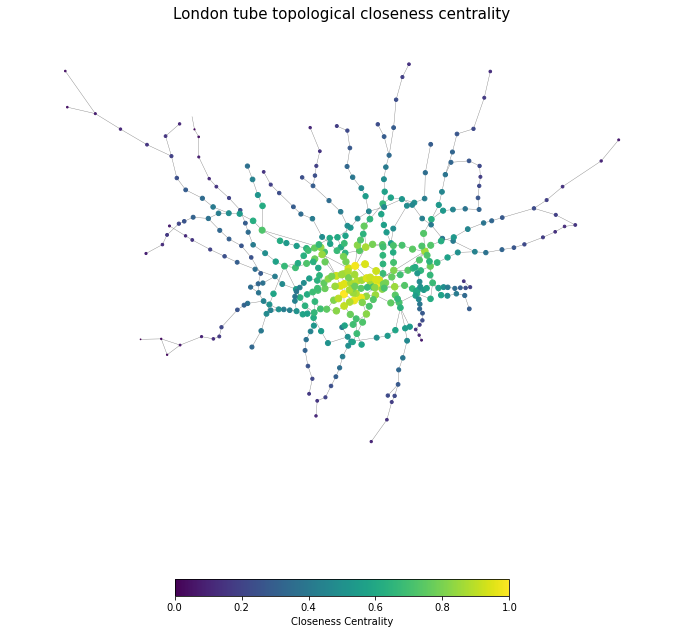

In [20]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G1.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G1.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G1.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G1, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G1,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

#### 1.2 Impact measures:

Giant Component Measure

Average Clustering Measure

#### 1.3 Node removal:

#### A) non-sequential removal:

#### 1）Degree Centrality on nodes:

In [21]:
G_degree_remove=G.copy()

In [22]:
# Number of existing nodes:
l0=list(G_degree_remove.nodes)
len(l0)

401

In [23]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[401]

In [24]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

401

In [25]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')


<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


##### Remove 1

In [26]:
#Remove the first one
deg_remove1 = ['Stratford']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove1)

In [27]:
# Number of existing nodes:
l1=list(G_degree_remove.nodes)
len(l1)

400

##### The largest component

In [28]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[379, 20, 1]

In [29]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

379

##### Clustering coefficient

In [30]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')


<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


##### Remove 2

In [31]:
# Remove the second node
deg_remove2 = ['Bank and Monument']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove2)

In [32]:
# Number of existing nodes:
l2=list(G_degree_remove.nodes)
len(l2)

399

##### The largest component

In [33]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[378, 20, 1]

In [34]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

378

##### Clustering coefficient

In [35]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030027449576321738


##### Remove 3

In [36]:
# Remove the third node
deg_remove3 = ["King's Cross St. Pancras"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove3)

In [37]:
# Number of existing nodes:
l3=list(G_degree_remove.nodes)
len(l3)

398

##### The largest component

In [38]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[377, 20, 1]

In [39]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

377

##### Clustering coefficient

In [40]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030270399617133268


##### Remove 4

In [41]:
# Remove the forth node
deg_remove4 = ["Baker Street"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove4)

In [42]:
# Number of existing nodes:
l4=list(G_degree_remove.nodes)
len(l4)

397

##### The largest component node

In [43]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[374, 20, 2, 1]

In [44]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

374

##### Clustering coefficient

In [45]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.027287993282955475


##### Remove the fifth node

In [46]:
# Remove the fifth node
deg_remove5 = ["Earl's Court"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove5)

In [47]:
# Number of existing nodes:
l5=list(G_degree_remove.nodes)
len(l5)

396

##### The largest component

In [48]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[373, 20, 2, 1]

In [49]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

373

##### Clustering coefficient

In [50]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Bond Street', 0.3333333333333333)]
avg clustering coefficient: 0.020538720538720537


##### Remove 6

In [51]:
# Remove the sixth node
deg_remove6 = ["Oxford Circus"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove6)

In [52]:
# Number of existing nodes:
l6=list(G_degree_remove.nodes)
len(l6)

395

##### The largest component

In [53]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[371, 20, 2, 1, 1]

In [54]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

371

##### Clustering coefficient

In [55]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.019071729957805903


##### Remove 7

In [56]:
# Remove the seventh node
deg_remove7 = ["Liverpool Street"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove7)

In [57]:
# Number of existing nodes:
l7=list(G_degree_remove.nodes)
len(l7)

394

##### The largest component

In [58]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[365, 20, 2, 5, 1, 1]

In [59]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

365

##### Clustering coefficient

In [60]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.019120135363790182


##### Remove 8

In [61]:
# Remove the eighth node
deg_remove8 = ["Waterloo"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove8)

In [62]:
# Number of existing nodes:
l8=list(G_degree_remove.nodes)
len(l8)

393

##### The largest component

In [63]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[364, 20, 2, 5, 1, 1]

In [64]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

364

##### Clustering coefficient

In [65]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.018066157760814248


##### Remove 9

In [66]:
# Remove the ninth node
deg_remove9 = ["Green Park"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove9)

In [67]:
# Number of existing nodes:
l9=list(G_degree_remove.nodes)
len(l9)

392

##### The largest component

In [68]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[363, 20, 2, 5, 1, 1]

In [69]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

363

##### Clustering coefficient

In [70]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Piccadilly Circus', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.019812925170068024


##### Remove 10

In [71]:
# Remove the tenth node
deg_remove10 = ["Canning Town"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_degree_remove.remove_nodes_from(deg_remove10)

In [72]:
# Number of existing nodes:
l10=list(G_degree_remove.nodes)
len(l10)

391

##### The largest component

In [73]:
# Has the graph one component?
print(nx.is_connected(G_degree_remove))
# number of connected components
nx.number_connected_components(G_degree_remove)
# To comput the size ( number of node) of each component
Subg = [G_degree_remove.subgraph(c).copy() for c in nx.connected_components(G_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[349, 20, 2, 5, 8, 1, 5, 1]

In [74]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

349

##### Clustering coefficient

In [75]:
# let's measure the clustering coefficient
c = nx.clustering(G_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Mornington Crescent', 1.0), ('Piccadilly Circus', 1.0), ('Heathrow Terminal 4', 1.0), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.016879795396419435


#### 2）Betweenness Centrality on nodes:

In [76]:
G_bet_remove=G.copy()

In [77]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [78]:
# Number of existing nodes:
m0=list(G_bet_remove.nodes)
len(m0)

401

In [79]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[401]

In [80]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

401

In [81]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


##### Remove 1

In [82]:
#Remove the first one
bet_remove1 = ['Stratford']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove1)

In [83]:
# Number of existing nodes:
m1=list(G_bet_remove.nodes)
len(m1)

400

##### The largest component

In [84]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[379, 20, 1]

In [85]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

379

##### Clustering coefficient

In [86]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


##### Remove 2

In [87]:
# Remove the second node
bet_remove2 = ['Bank and Monument']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove2)

In [88]:
# Number of existing nodes:
m2=list(G_bet_remove.nodes)
len(m2)

399

##### The largest component

In [89]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[378, 20, 1]

In [90]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

378

##### Clustering coefficient

In [91]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030027449576321738


##### Remove 3

In [92]:
# Remove the third node
bet_remove3 = ["Liverpool Street"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove3)

In [93]:
# Number of existing nodes:
m3=list(G_bet_remove.nodes)
len(m3)

398

##### The largest component

In [94]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[377, 20, 1]

In [95]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

377

##### Clustering coefficient

In [96]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030102895429528577


##### Remove 4

In [97]:
# Remove the forth node
bet_remove4 = ["King's Cross St. Pancras"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove4)

In [98]:
# Number of existing nodes:
m4=list(G_bet_remove.nodes)
len(m4)

397

##### The largest component node

In [99]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[371, 20, 5, 1]

In [100]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

371

##### Clustering coefficient

In [101]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030346647475110934


##### Remove 5

In [102]:
# Remove the fifth node
bet_remove5 = ["Waterloo"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove5)

In [103]:
# Number of existing nodes:
m5=list(G_bet_remove.nodes)
len(m5)

396

##### The largest component

In [104]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[370, 20, 5, 1]

In [105]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

370

##### Clustering coefficient

In [106]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029329004329004316


##### Remove 6

In [107]:
# Remove the sixth node
bet_remove6 = ["Green Park"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove6)

In [108]:
# Number of existing nodes:
m6=list(G_bet_remove.nodes)
len(m6)

395

##### The largest component

In [109]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[369, 20, 5, 1]

In [110]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

369

##### Clustering coefficient

In [111]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028306208559373106


##### Remove 7

In [112]:
# Remove the seventh node
bet_remove7 = ["Euston"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove7)

In [113]:
# Number of existing nodes:
m7=list(G_bet_remove.nodes)
len(m7)

394

##### The largest component

In [114]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[346, 20, 5, 1, 22]

In [115]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

346

##### Clustering coefficient

In [116]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.02499395697365239


##### Remove 8

In [117]:
# Remove the eighth node
bet_remove8 = ["Westminster"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove8)

In [118]:
# Number of existing nodes:
m8=list(G_bet_remove.nodes)
len(m8)

393

##### The largest component

In [119]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[345, 20, 5, 1, 22]

In [120]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

345

##### Clustering coefficient

In [121]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.025057554828547178


##### Remove 9

In [122]:
# Remove the ninth node
bet_remove9 = ["Baker Street"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove9)

In [123]:
# Number of existing nodes:
m9=list(G_bet_remove.nodes)
len(m9)

392

##### The largest component

In [124]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[342, 20, 2, 5, 1, 22]

In [125]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

342

##### Clustering coefficient

In [126]:
# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Heathrow Terminal 4', 1.0), ('Kensington', 0.3333333333333333)]
avg clustering coefficient: 0.021598639455782304


##### Remove 10

In [127]:
# Remove the tenth node
bet_remove10 = ["Finchley Road"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_bet_remove.remove_nodes_from(bet_remove10)

In [128]:
# Number of existing nodes:
m10=list(G_bet_remove.nodes)
len(m10)

391

##### The largest component

In [129]:
# Has the graph one component?
print(nx.is_connected(G_bet_remove))
# number of connected components
nx.number_connected_components(G_bet_remove)
# To comput the size ( number of node) of each component
Subg = [G_bet_remove.subgraph(c).copy() for c in nx.connected_components(G_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[339, 2, 20, 2, 5, 1, 22]

In [130]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

339

##### Clustering coefficient

In [131]:
##### Clustering coefficient# let's measure the clustering coefficient
c = nx.clustering(G_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Heathrow Terminal 4', 1.0), ('Kensington', 0.3333333333333333)]
avg clustering coefficient: 0.021653878942881493


#### 3）Closeness Centrality:

In [132]:
G_clos_remove=G.copy()

In [133]:
# Number of existing nodes:
n0=list(G_clos_remove.nodes)
len(n0)

401

In [134]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[401]

In [135]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

401

In [136]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


##### Remove 1

In [137]:
#Remove the first one
clos_remove1 = ['Green Park']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove1)

In [138]:
# Number of existing nodes:
n1=list(G_clos_remove.nodes)
len(n1)

400

##### The largest component

In [139]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[400]

In [140]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

400

##### Clustering coefficient

In [141]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029791666666666657


##### Remove 2

In [142]:
# Remove the second node
clos_remove2 = ['Bank and Monument']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove2)

In [143]:
# Number of existing nodes:
n2=list(G_clos_remove.nodes)
len(n2)

399

##### The largest component

In [144]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[399]

In [145]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

399

##### Clustering coefficient

In [146]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029275569877073627


##### Remove 3

In [147]:
# Remove the third node
clos_remove3 = ["King's Cross St. Pancras"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove3)

In [148]:
# Number of existing nodes:
n3=list(G_clos_remove.nodes)
len(n3)

398

##### The largest component

In [149]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[398]

In [150]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

398

##### Clustering coefficient

In [151]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02951663077291217


##### Remove 4

In [152]:
# Remove the forth node
clos_remove4 = ["Westminster"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove4)

In [153]:
# Number of existing nodes:
n4=list(G_clos_remove.nodes)
len(n4)

397

##### The largest component node

In [154]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[397]

In [155]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

397

##### Clustering coefficient

In [156]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028079644956219254


##### Remove 5

In [157]:
# Remove the fifth node
clos_remove5 = ["Waterloo"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove5)

In [158]:
# Number of existing nodes:
n5=list(G_clos_remove.nodes)
len(n5)

396

##### The largest component node

In [159]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[396]

In [160]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

396

##### Clustering coefficient

In [161]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02815055315055314


##### Remove 6

In [162]:
# Remove the sixth node
clos_remove6 = ["Oxford Circus"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove6)

In [163]:
# Number of existing nodes:
n6=list(G_clos_remove.nodes)
len(n6)

395

##### The largest component

In [164]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[395]

In [165]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

395

##### Clustering coefficient

In [166]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02990958408679927


##### Remove 7

In [167]:
# Remove the seventh node
clos_remove7 = ["Bond Street"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove7)

In [168]:
# Number of existing nodes:
n7=list(G_clos_remove.nodes)
len(n7)

394

##### The largest component

In [169]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[394]

In [170]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

394

##### Clustering coefficient

In [171]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030033840947546523


##### Remove 8

In [172]:
# Remove the eighth node
deg_remove8 = ["Farringdon"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(deg_remove8)

In [173]:
# Number of existing nodes:
n8=list(G_clos_remove.nodes)
len(n8)

393

##### The largest component

In [174]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[393]

In [175]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

393

##### Clustering coefficient

In [176]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030110262934690407


##### Remove 9

In [177]:
# Remove the ninth node
clos_remove9 = ["Angel"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove9)

In [178]:
# Number of existing nodes:
n9=list(G_clos_remove.nodes)
len(n9)

392

##### The largest component

In [179]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[392]

In [180]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

392

##### Clustering coefficient

In [181]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030187074829931965


##### Remove 10

In [182]:
# Remove the tenth node
clos_remove10 = ["Moorgate"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G_clos_remove.remove_nodes_from(clos_remove10)

In [183]:
# Number of existing nodes:
n10=list(G_clos_remove.nodes)
len(n10)

391

##### The largest component

In [184]:
# Has the graph one component?
print(nx.is_connected(G_clos_remove))
# number of connected components
nx.number_connected_components(G_clos_remove)
# To comput the size ( number of node) of each component
Subg = [G_clos_remove.subgraph(c).copy() for c in nx.connected_components(G_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[389, 1, 1]

In [185]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

389

##### Clustering coefficient

In [186]:
# let's measure the clustering coefficient
c = nx.clustering(G_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030264279624893427


#### B) sequential removal:

##### 1）Degree Centrality on nodes:

In [187]:
GS_degree_remove=G.copy()

In [188]:
# Number of existing nodes:
x0=list(GS_degree_remove.nodes)
len(x0)

401

In [189]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[401]

In [190]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

401

In [191]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


##### Remove 1

In [192]:
#Remove the first one
sdeg_remove1 = ['Stratford']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove1)

In [193]:
# Number of existing nodes:
x1=list(GS_degree_remove.nodes)
len(x1)

400

##### The largest component

In [194]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[379, 20, 1]

In [195]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

379

##### Clustering coefficient

In [196]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


##### Recompute the centrality measure

In [197]:
# We can calculate the degree centrality using networkx function:
deg_london1 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london1),'degree')

In [198]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
Bank and Monument,0.020050
King's Cross St. Pancras,0.017544
Baker Street,0.017544
Earl's Court,0.015038
Oxford Circus,0.015038
Canning Town,0.015038
Green Park,0.015038
Waterloo,0.015038
Liverpool Street,0.012531
Euston,0.012531


##### Remove 2

In [199]:
# Remove the second node
sdeg_remove2 = ['Bank and Monument']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove2)

In [200]:
# Number of existing nodes:
x2=list(GS_degree_remove.nodes)
len(x2)

399

##### The largest component

In [201]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[378, 20, 1]

In [202]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

378

##### Clustering coefficient

In [203]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030027449576321738


##### Recompute the centrality measure

In [204]:
# We can calculate the degree centrality using networkx function:
deg_london2 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london2),'degree')

In [205]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
Baker Street,0.017588
King's Cross St. Pancras,0.017588
Oxford Circus,0.015075
Green Park,0.015075
Canning Town,0.015075
Earl's Court,0.015075
Turnham Green,0.012563
Euston,0.012563
Waterloo,0.012563
Willesden Junction,0.012563


##### Remove 3

In [206]:
# Remove the second node
sdeg_remove3 = ['Baker Street']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove3)

In [207]:
# Number of existing nodes:
x3=list(GS_degree_remove.nodes)
len(x3)

398

##### The largest component

In [208]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[377, 20, 1]

In [209]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

377

##### Clustering coefficient

In [210]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.02705192629815743


##### Recompute the centrality measure

In [211]:
# We can calculate the degree centrality using networkx function:
deg_london3 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london3),'degree')

In [212]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
King's Cross St. Pancras,0.017632
Earl's Court,0.015113
Oxford Circus,0.015113
Green Park,0.015113
Canning Town,0.015113
Willesden Junction,0.012594
Euston,0.012594
Waterloo,0.012594
Turnham Green,0.012594
West Ham,0.012594


##### Remove 4

In [213]:
# Remove the second node
sdeg_remove4 = ["King's Cross St. Pancras"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove4)

In [214]:
# Number of existing nodes:
x4=list(GS_degree_remove.nodes)
len(x4)

397

##### The largest component

In [215]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[374, 20, 2, 1]

In [216]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

374

##### Clustering coefficient

In [217]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.027287993282955475


##### Recompute the centrality measure

In [218]:
# We can calculate the degree centrality using networkx function:
deg_london4 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london4),'degree')

In [219]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
Earl's Court,0.015152
Green Park,0.015152
Oxford Circus,0.015152
Canning Town,0.015152
Turnham Green,0.012626
West Ham,0.012626
Willesden Junction,0.012626
Waterloo,0.012626
Hammersmith,0.010101
Piccadilly Circus,0.010101


##### Remove 5

In [220]:
# Remove the fifth node
sdeg_remove5 = ["Earl's Court"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove5)

In [221]:
# Number of existing nodes:
x5=list(GS_degree_remove.nodes)
len(x5)

396

##### The largest component

In [222]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[373, 20, 2, 1]

In [223]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

373

##### Clustering coefficient

In [224]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Bond Street', 0.3333333333333333)]
avg clustering coefficient: 0.020538720538720537


##### Recompute the centrality measure

In [225]:
# We can calculate the degree centrality using networkx function:
deg_london5 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london5),'degree')

In [226]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
Green Park,0.015190
Canning Town,0.015190
Oxford Circus,0.015190
Waterloo,0.012658
Willesden Junction,0.012658
Turnham Green,0.012658
West Ham,0.012658
Liverpool Street,0.010127
Hammersmith,0.010127
Holborn,0.010127


##### Remove 6

In [227]:
# Remove the sixth node
sdeg_remove6 = ['Green Park']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove6)

In [228]:
# Number of existing nodes:
x6=list(GS_degree_remove.nodes)
len(x6)

395

##### The largest component

In [229]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[372, 20, 2, 1]

In [230]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

372

##### Clustering coefficient

In [231]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333)]
avg clustering coefficient: 0.019493670886075946


##### Recompute the centrality measure

In [232]:
# We can calculate the degree centrality using networkx function:
deg_london6 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london6),'degree')

In [233]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
Canning Town,0.015228
Waterloo,0.012690
Oxford Circus,0.012690
West Ham,0.012690
Willesden Junction,0.012690
Turnham Green,0.012690
Blackhorse Road,0.010152
Tottenham Court Road,0.010152
Holborn,0.010152
Liverpool Street,0.010152


##### Remove 7

In [234]:
# Remove the seventh node
sdeg_remove7 = ['Canning Town']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove7)

In [235]:
# Number of existing nodes:
x7=list(GS_degree_remove.nodes)
len(x7)

394

##### The largest component

In [236]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[358, 20, 2, 8, 1, 5]

In [237]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

358

##### Clustering coefficient

In [238]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.016582064297800337


##### Recompute the centrality measure

In [239]:
# We can calculate the degree centrality using networkx function:
deg_london7 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london7),'degree')

In [240]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
Willesden Junction,0.012723
Turnham Green,0.012723
Waterloo,0.012723
Oxford Circus,0.012723
Wembley Park,0.010178
Tottenham Court Road,0.010178
Kennington,0.010178
West Hampstead,0.010178
Stockwell,0.010178
Holborn,0.010178


##### Remove 8

In [241]:
# Remove the eighth node
sdeg_remove8 = ['Willesden Junction']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove8)

In [242]:
# Number of existing nodes:
x8=list(GS_degree_remove.nodes)
len(x8)

393

##### The largest component

In [243]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[344, 20, 13, 2, 8, 1, 5]

In [244]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

344

##### Clustering coefficient

In [245]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.01662425784563189


##### Recompute the centrality measure

In [246]:
# We can calculate the degree centrality using networkx function:
deg_london8 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london8),'degree')

In [247]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
Turnham Green,0.012755
Oxford Circus,0.012755
Waterloo,0.012755
Camden Town,0.010204
Blackhorse Road,0.010204
Acton Town,0.010204
Finsbury Park,0.010204
Notting Hill Gate,0.010204
Hammersmith,0.010204
Euston,0.010204


##### Remove 9

In [248]:
# Remove the ninth node
sdeg_remove9 = ['Turnham Green']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove9)

In [249]:
# Number of existing nodes:
x9=list(GS_degree_remove.nodes)
len(x9)

392

##### The largest component

In [250]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[338, 20, 5, 13, 2, 8, 1, 5]

In [251]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

338

##### Clustering coefficient

In [252]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333), ('Westferry', 0.3333333333333333), ('West India Quay', 0.3333333333333333)]
avg clustering coefficient: 0.013435374149659868


##### Recompute the centrality measure

In [253]:
# We can calculate the degree centrality using networkx function:
deg_london9 =nx.degree_centrality(GS_degree_remove)
nx.set_node_attributes(GS_degree_remove,dict(deg_london9),'degree')

In [254]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=GS_degree_remove.nodes())
#df['source'] = pd.Series(nx.get_node_attributes(G1, 'source'))

df['degree'] = pd.Series(nx.get_node_attributes(GS_degree_remove, 'degree'))


df_sorted_deg = df.sort_values(['degree'], ascending=False)
df_sorted_deg[0:10]

,degree
Oxford Circus,0.012788
Waterloo,0.012788
Wembley Park,0.010230
Camden Town,0.010230
Whitechapel,0.010230
Liverpool Street,0.010230
Shadwell,0.010230
Surrey Quays,0.010230
Holborn,0.010230
Tottenham Court Road,0.010230


##### Remove 10

In [255]:
# Remove the tenth node
sdeg_remove10 = ['Oxford Circus']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_degree_remove.remove_nodes_from(sdeg_remove10)

In [256]:
# Number of existing nodes:
x10=list(GS_degree_remove.nodes)
len(x10)

391

##### The largest component

In [257]:
# Has the graph one component?
print(nx.is_connected(GS_degree_remove))
# number of connected components
nx.number_connected_components(GS_degree_remove)
# To comput the size ( number of node) of each component
Subg = [GS_degree_remove.subgraph(c).copy() for c in nx.connected_components(GS_degree_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[336, 20, 5, 13, 2, 8, 1, 5, 1]

In [258]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_degree_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_degree_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

336

##### Clustering coefficient

In [259]:
# let's measure the clustering coefficient
c = nx.clustering(GS_degree_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Mornington Crescent', 1.0), ('Piccadilly Circus', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.015174765558397273


##### 2）Betweenness Centrality on nodes:

In [260]:
GS_bet_remove=G.copy()

In [261]:
# Number of existing nodes:
y0=list(GS_bet_remove.nodes)
len(y0)

401

In [262]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[401]

In [263]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

401

In [264]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


##### Remove 1

In [265]:
#Remove the first one
sbet_remove1 = ['Stratford']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove1)

In [266]:
# Number of existing nodes:
y1=list(GS_bet_remove.nodes)
len(y1)

400

##### The largest component

In [267]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[379, 20, 1]

In [268]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

379

##### Clustering coefficient

In [269]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


##### Recompute the centrality measure

In [270]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t1=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t1,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
King's Cross St. Pancras,19632.883550
Bank and Monument,16189.930087
Euston,15681.102778
Highbury & Islington,14784.085931
Baker Street,13681.567136
Waterloo,13292.924892
Green Park,12745.906025
Finsbury Park,12299.226407
Finchley Road,12180.319913
Canada Water,12115.210714


##### Remove 2

In [271]:
# Remove the second node
sbet_remove2 = ["King's Cross St. Pancras"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove2)

In [272]:
# Number of existing nodes:
y2=list(GS_bet_remove.nodes)
len(y2)

399

##### The largest component

In [273]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[378, 20, 1]

In [274]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

378

##### Clustering coefficient

In [275]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030868838763575587


##### Recompute the centrality measure

In [276]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t2=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t2,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
Waterloo,20080.980760
Bank and Monument,19144.467332
Green Park,18186.478385
Westminster,17218.913235
Finchley Road,14393.783054
Baker Street,13458.302101
West Hampstead,12864.995752
Canada Water,12392.237430
Willesden Junction,11285.184294
Bond Street,11006.952616


##### Remove 3

In [277]:
# Remove the third node
sbet_remove3 = ['Waterloo']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove3)

In [278]:
# Number of existing nodes:
y3=list(GS_bet_remove.nodes)
len(y3)

398

##### The largest component

In [279]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[377, 20, 1]

In [280]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

377

##### Clustering coefficient

In [281]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029971284996410608


##### Recompute the centrality measure

In [282]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t3=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t3,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
Bank and Monument,16872.849206
Finchley Road,15055.303968
Canada Water,14336.566667
Oxford Circus,14324.949206
West Hampstead,14080.100000
Baker Street,13427.806349
Holborn,12876.052381
Tottenham Court Road,12605.135714
Chancery Lane,12603.044444
St. Paul's,12595.711111


##### Remove 4

In [283]:
# Remove the forth node
sbet_remove4 = ['Bank and Monument']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove4)

In [284]:
# Number of existing nodes:
y4=list(GS_bet_remove.nodes)
len(y4)

397

##### The largest component

In [285]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[376, 20, 1]

In [286]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

376

##### Clustering coefficient

In [287]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029255127743792717


##### Recompute the centrality measure

In [288]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t4=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t4,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
Canada Water,19153.841667
West Hampstead,18340.209921
Finchley Road,17667.151984
Gospel Oak,16164.391667
Finchley Road & Frognal,16140.391667
Hampstead Heath,16066.391667
Baker Street,14319.985317
Canary Wharf,13716.833333
Willesden Junction,12416.992063
Surrey Quays,12204.383333


##### Remove 5

In [289]:
# Remove the fifth node
sbet_remove5 = ["Canada Water"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove5)

In [290]:
# Number of existing nodes:
y5=list(GS_bet_remove.nodes)
len(y5)

396

##### The largest component

In [291]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[375, 20, 1]

In [292]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

375

##### Clustering coefficient

In [293]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029329004329004316


##### Recompute the centrality measure

In [294]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t5=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t5,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
West Hampstead,35548.318254
Finchley Road & Frognal,33288.000000
Gospel Oak,33242.500000
Hampstead Heath,33205.000000
Finchley Road,24928.676984
Highbury & Islington,21472.183333
Kentish Town West,20410.000000
Camden Road,20276.500000
Caledonian Road & Barnsbury,20178.500000
Baker Street,19593.843651


##### Remove 6

In [295]:
# Remove the sixth node
sbet_remove6 = ["West Hampstead"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove6)

In [296]:
# Number of existing nodes:
y7=list(GS_bet_remove.nodes)
len(y7)

395

##### The largest component

In [297]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[227, 147, 20, 1]

In [298]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

227

##### Clustering coefficient

In [299]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02940325497287521


##### Recompute the centrality measure

In [300]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t6=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t6,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
Earl's Court,7446.480159
Baker Street,6773.058730
Willesden Junction,5841.986111
Victoria,5776.970635
West Brompton,5513.000000
Wembley Park,5263.358730
Finchley Road,5245.858730
Shepherd's Bush,5126.038889
Euston,5118.013889
Green Park,4683.462698


##### Remove 7

In [301]:
# Remove the seventh node
sbet_remove7 = ["Earl's Court"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove7)

In [302]:
# Number of existing nodes:
y7=list(GS_bet_remove.nodes)
len(y7)

394

##### The largest component

In [303]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[226, 147, 20, 1]

In [304]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

226

##### Clustering coefficient

In [305]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.022625090645395207


##### Recompute the centrality measure

In [306]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t7=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t7,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
Shepherd's Bush,9925.222222
Willesden Junction,7948.119801
Baker Street,7047.824643
Notting Hill Gate,6656.805556
Holland Park,6480.222222
Euston,5530.703134
Kensington,5516.000000
West Brompton,5486.000000
Wembley Park,5402.916667
Finchley Road,5272.250000


##### Remove 8

In [307]:
# Remove the second node
sbet_remove8 = ["Shepherd's Bush"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove8)

In [308]:
# Number of existing nodes:
y8=list(GS_bet_remove.nodes)
len(y8)

393

##### The largest component

In [309]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[196, 147, 20, 29, 1]

In [310]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

196

##### Clustering coefficient

In [311]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.022682660850599775


##### Recompute the centrality measure

In [312]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t8=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t8,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
Euston,6673.092023
Willesden Junction,5964.175357
Baker Street,5958.157977
Oxford Circus,5752.633155
Green Park,5425.874733
Warren Street,5305.825357
Queen's Park,5304.592023
Kensal Green,5111.175357
Wembley Park,4608.666667
Turnham Green,4603.175357


##### Remove 9

In [313]:
# Remove the ninth node
sbet_remove9 = ['Euston']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove9)

In [314]:
# Number of existing nodes:
y9=list(GS_bet_remove.nodes)
len(y9)

392

##### The largest component

In [315]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[173, 147, 20, 29, 1, 22]

In [316]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

173

##### Clustering coefficient

In [317]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0), ('Edgware Road', 0.3333333333333333)]
avg clustering coefficient: 0.019339164237123417


##### Recompute the centrality measure

In [318]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t9=nx.betweenness_centrality(GS_bet_remove, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_bet_remove,bet_london_t9,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_bet_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GS_bet_remove, 'betweenness_t'))

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False)
df_sorted_bet[0:10]

,betweenness_t
Baker Street,7505.333333
Paddington,5763.500000
Bond Street,5190.552381
Edgware Road,5058.166667
Green Park,4761.771429
Acton Town,3866.500000
Wembley Park,3857.000000
Turnham Green,3709.500000
Victoria,3673.500000
West Ham,3537.883333


##### Remove 10

In [319]:
# Remove the tenth node
sbet_remove10 = ['Baker Street']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_bet_remove.remove_nodes_from(sbet_remove10)

In [320]:
# Number of existing nodes:
y10=list(GS_bet_remove.nodes)
len(y10)

391

##### The largest component

In [321]:
# Has the graph one component?
print(nx.is_connected(GS_bet_remove))
# number of connected components
nx.number_connected_components(GS_bet_remove)
# To comput the size ( number of node) of each component
Subg = [GS_bet_remove.subgraph(c).copy() for c in nx.connected_components(GS_bet_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[170, 147, 20, 29, 2, 1, 22]

In [322]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_bet_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_bet_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

170

##### Clustering coefficient

In [323]:
# let's measure the clustering coefficient
c = nx.clustering(GS_bet_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Heathrow Terminal 4', 1.0), ('Bond Street', 0.3333333333333333), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.016283034953111678


##### 3）Closeness Centrality:

In [324]:
GS_clos_remove=G.copy()

In [325]:
# Number of existing nodes:
z0=list(GS_clos_remove.nodes)
len(z0)

401

In [326]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[401]

In [327]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

401

In [328]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


##### Remove 1

In [329]:
#Remove the first one
sclos_remove1 = ['Green Park']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove1)

In [330]:
# Number of existing nodes:
z1=list(GS_clos_remove.nodes)
len(z1)

400

##### The largest component

In [331]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[400]

In [332]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

400

##### Clustering coefficient

In [333]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029791666666666657


##### Recompute the centrality measure

In [334]:
clos_t1=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t1,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
King's Cross St. Pancras,0.112363
Angel,0.110221
Farringdon,0.110221
Moorgate,0.109615
Bank and Monument,0.109435
Barbican,0.108897
Old Street,0.108897
Liverpool Street,0.107984
Euston,0.107576
Waterloo,0.107143


##### Remove 2

In [335]:
# Remove the second node
sclos_remove2 = ["King's Cross St. Pancras"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove2)

In [336]:
# Number of existing nodes:
z2=list(GS_clos_remove.nodes)
len(z2)

399

##### The largest component

In [337]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[399]

In [338]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

399

##### Clustering coefficient

In [339]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030033416875522127


##### Recompute the centrality measure

In [340]:
clos_t2=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t2,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Waterloo,0.104654
Bank and Monument,0.104489
Embankment,0.101868
Westminster,0.101350
Liverpool Street,0.101324
St. Paul's,0.099849
Charing Cross,0.098466
Moorgate,0.097933
Stratford,0.097549
Shadwell,0.097358


##### Remove 3

In [341]:
# Remove the third node
sclos_remove3 = ['Waterloo']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove3)

In [342]:
# Number of existing nodes:
z3=list(GS_clos_remove.nodes)
len(z3)

398

##### The largest component

In [343]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[398]

In [344]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

398

##### Clustering coefficient

In [345]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028715003589375437


##### Recompute the centrality measure

In [346]:
clos_t3=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t3,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Bank and Monument,0.097423
St. Paul's,0.096126
Oxford Circus,0.095663
Chancery Lane,0.095525
Holborn,0.095113
Tottenham Court Road,0.095044
Liverpool Street,0.094682
Bond Street,0.094569
Regent's Park,0.093149
Baker Street,0.092844


##### Remove 4

In [347]:
# Remove the forth node
sclos_remove4 = ["Bank and Monument"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove4)

In [348]:
# Number of existing nodes:
z4=list(GS_clos_remove.nodes)
len(z4)

397

##### The largest component

In [349]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[397]

In [350]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

397

##### Clustering coefficient

In [351]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028079644956219254


##### Recompute the centrality measure

In [352]:
clos_t4=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t4,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
West Hampstead,0.081734
Finchley Road & Frognal,0.080816
Hampstead Heath,0.080162
Gospel Oak,0.079742
Finchley Road,0.079662
Kensington,0.079518
West Brompton,0.079502
Brondesbury,0.079375
Shepherd's Bush,0.079295
Earl's Court,0.079248


##### Remove 5

In [353]:
# Remove the fifth node
sclos_remove5 = ["West Hampstead"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove5)

In [354]:
# Number of existing nodes:
z5=list(GS_clos_remove.nodes)
len(z5)

396

##### The largest component

In [355]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

True


[396]

In [356]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

396

##### Clustering coefficient

In [357]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02815055315055314


##### Recompute the centrality measure

In [358]:
clos_t5=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t5,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Canada Water,0.075976
Surrey Quays,0.075540
Queens Road Peckham,0.075009
Peckham Rye,0.074782
West Brompton,0.074613
Denmark Hill,0.074556
Imperial Wharf,0.074500
Clapham Junction,0.074416
Wandsworth Road,0.074388
Clapham High Street,0.074332


##### Remove 6

In [359]:
# Remove the sixth node
sclos_remove6 = ["Canada Water"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove6)

In [360]:
# Number of existing nodes:
z6=list(GS_clos_remove.nodes)
len(z6)

395

##### The largest component

In [361]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[226, 169]

In [362]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

226

##### Clustering coefficient

In [363]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.0282218203737191


##### Recompute the centrality measure

In [364]:
clos_t=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Stratford,0.063732
Earl's Court,0.063483
Notting Hill Gate,0.063109
High Street Kensington,0.062253
Shepherd's Bush,0.062223
Kensington,0.061302
Bayswater,0.060809
Gloucester Road,0.060752
Holland Park,0.060551
Willesden Junction,0.060324


##### Remove 7

In [365]:
# Remove the seventh node
sclos_remove7 = ["Stratford"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove7)

In [366]:
# Number of existing nodes:
z7=list(GS_clos_remove.nodes)
len(z7)

394

##### The largest component

In [367]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[226, 147, 20, 1]

In [368]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

226

##### Clustering coefficient

In [369]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028378051728305525


##### Recompute the centrality measure

In [370]:
clos_t7=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t7,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Earl's Court,0.063645
Notting Hill Gate,0.063270
High Street Kensington,0.062411
Shepherd's Bush,0.062381
Kensington,0.061458
Bayswater,0.060964
Gloucester Road,0.060906
Holland Park,0.060705
Willesden Junction,0.060477
West Brompton,0.060392


##### Remove 8

In [371]:
# Remove the eighth node
sclos_remove8 = ["Earl's Court"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove8)

In [372]:
# Number of existing nodes:
z8=list(GS_clos_remove.nodes)
len(z8)

393

##### The largest component

In [373]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[225, 147, 20, 1]

In [374]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

225

##### Clustering coefficient

In [375]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.021580031503695623


##### Recompute the centrality measure

In [376]:
clos_t8=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t8,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Shepherd's Bush,0.060434
Notting Hill Gate,0.060235
Holland Park,0.059925
Willesden Junction,0.059177
Bayswater,0.058288
Paddington,0.057866
Queensway,0.057658
Kensal Green,0.056838
Edgware Road,0.056687
Bond Street,0.056487


##### Remove 9

In [377]:
# Remove the ninth node
sclos_remove9 = ["Shepherd's Bush"]
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove9)

In [378]:
# Number of existing nodes:
z9=list(GS_clos_remove.nodes)
len(z9)

392

##### The largest component

In [379]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[195, 147, 20, 29, 1]

In [380]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

195

##### Clustering coefficient

In [381]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.021635082604470356


##### Recompute the centrality measure

In [382]:
clos_t9=nx.closeness_centrality(GS_clos_remove)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GS_clos_remove,clos_t9,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GS_clos_remove.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GS_clos_remove, 'closeness_t'))

df_sorted_clos = df.sort_values(["closeness_t"], ascending=False)
df_sorted_clos[0:10]

,closeness_t
Oxford Circus,0.050501
Warren Street,0.049899
Paddington,0.049719
Baker Street,0.049668
Euston,0.049362
Edgware Road,0.049337
Bond Street,0.049185
Regent's Park,0.048861
South Hampstead,0.048008
Warwick Avenue,0.047651


##### Remove 10

In [383]:
# Remove the tenth node
sclos_remove10 = ['Oxford Circus']
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
GS_clos_remove.remove_nodes_from(sclos_remove10)

In [384]:
# Number of existing nodes:
z10=list(GS_clos_remove.nodes)
len(z10)

391

##### The largest component

In [385]:
# Has the graph one component?
print(nx.is_connected(GS_clos_remove))
# number of connected components
nx.number_connected_components(GS_clos_remove)
# To comput the size ( number of node) of each component
Subg = [GS_clos_remove.subgraph(c).copy() for c in nx.connected_components(GS_clos_remove)]
[len(subgraph.nodes) for subgraph in Subg]

False


[194, 147, 20, 29, 1]

In [386]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(GS_clos_remove)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = GS_clos_remove.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

194

##### Clustering coefficient

In [387]:
# let's measure the clustering coefficient
c = nx.clustering(GS_clos_remove)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Piccadilly Circus', 1.0)]
avg clustering coefficient: 0.023395445134575553


#### Plot

In [388]:
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

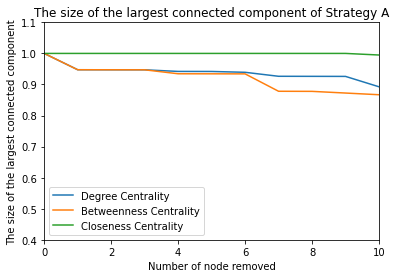

In [389]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [401/401,379/400,378/399,377/398,374/397,373/396,371/395,365/394,364/393,363/392,349/391]
z = [401/401,379/400,378/399,377/398,371/397,370/396,369/395,346/394,345/393,342/392,339/391]
a = [401/401,400/400,399/399,398/398,397/397,396/396,395/395,394/394,393/393,392/392,389/391]
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,a)
plt.title("The size of the largest connected component of Strategy A")
plt.xlabel("Number of node removed")
plt.ylabel("The size of the largest connected component")
#x_major_locator = MultipleLocator(1)
#ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(xmax=10,xmin=0)
plt.ylim(ymax=1.1,ymin=0.4)
plt.legend(["Degree Centrality","Betweenness Centrality","Closeness Centrality"])
plt.show()

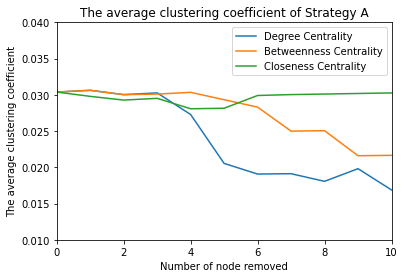

In [390]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [0.030382377389858668,0.030624999999999982,0.030027449576321738,0.030270399617133268,
     0.027287993282955475,0.020538720538720537,0.019071729957805903,0.019120135363790182,
     0.018066157760814248,0.019812925170068024,0.016879795396419435]
z = [0.030382377389858668,0.030624999999999982,0.030027449576321738,0.030102895429528577,
     0.030346647475110934,0.029329004329004316,0.028306208559373106,0.02499395697365239,
     0.025057554828547178,0.021598639455782304,0.021653878942881493]
a = [0.030382377389858668,0.029791666666666657,0.029275569877073627,0.02951663077291217,
     0.028079644956219254,0.02815055315055314,0.02990958408679927,0.030033840947546523,
     0.030110262934690407,0.030187074829931965,0.030264279624893427]
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,a)
plt.xlim(xmax=10,xmin=0)
plt.ylim(ymax=0.04,ymin=0.01)
x_major_locator=MultipleLocator(1)
plt.title("The average clustering coefficient of Strategy A")
plt.xlabel("Number of node removed")
plt.ylabel("The average clustering coefficient")
plt.legend(["Degree Centrality","Betweenness Centrality","Closeness Centrality"])
plt.show()

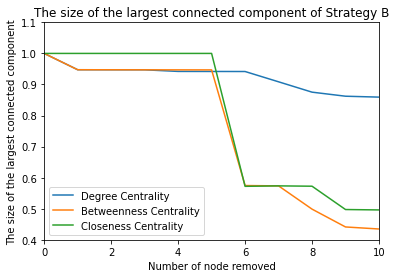

In [391]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [401/401,379/400,378/399,377/398,374/397,373/396,372/395,358/394,344/393,338/392,336/391]
z = [401/401,379/400,378/399,377/398,376/397,375/396,227/395,226/394,196/393,173/392,170/391]
a = [401/401,400/400,399/399,398/398,397/397,396/396,226/395,226/394,225/393,195/392,194/391]
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,a)
plt.xlim(xmax=10,xmin=0)
plt.ylim(ymax=1.1,ymin=0.4)
plt.title("The size of the largest connected component of Strategy B")
plt.xlabel("Number of node removed")
plt.ylabel("The size of the largest connected component")
plt.legend(["Degree Centrality","Betweenness Centrality","Closeness Centrality"])
plt.show()

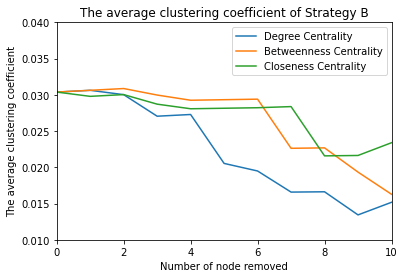

In [392]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [0.030382377389858668,0.030624999999999982,0.030027449576321738,0.02705192629815743,
     0.027287993282955475,0.020538720538720537,0.019493670886075946,0.016582064297800337,
     0.01662425784563189,0.013435374149659868,0.015174765558397273]
z = [0.030382377389858668,0.030624999999999982,0.030868838763575587,0.029971284996410608,
     0.029255127743792717,0.029329004329004316,0.02940325497287521,0.022625090645395207,
     0.022682660850599775,0.019339164237123417,0.016283034953111678]
a = [0.030382377389858668,0.029791666666666657,0.030033416875522127,0.028715003589375437,
     0.028079644956219254,0.02815055315055314,0.0282218203737191,0.028378051728305525,
     0.021580031503695623,0.021635082604470356,0.023395445134575553]
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,a)
plt.xlim(xmax=10,xmin=0)
plt.ylim(ymax=0.04,ymin=0.01)
plt.title("The average clustering coefficient of Strategy B")
plt.xlabel("Number of node removed")
plt.ylabel("The average clustering coefficient")
plt.legend(["Degree Centrality","Betweenness Centrality","Closeness Centrality"])
plt.show()

### II. Flows: weighted network

II.1.

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [394]:
G2=G.copy()

In [395]:
# given that the network is weighted let us introduce the weights.
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are
# Inverse weights:
inv_weights={(e1, e2):( 0 if weight==0 else round(1./weight,7)) for e1, e2, weight in G2.edges(data='flows')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(G2, inv_weights, 'inv_weights')

In [396]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G2,weight='inv_weights',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G2,bet_london_w,'betweenness_w')

In [397]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G2.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G2, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G2, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
Green Park,44892.50
Bank and Monument,39758.50
Waterloo,31904.25
Westminster,29664.50
Liverpool Street,26530.00
Stratford,26125.00
Bond Street,22996.50
Euston,22314.00
Oxford Circus,21207.00
Warren Street,19916.00


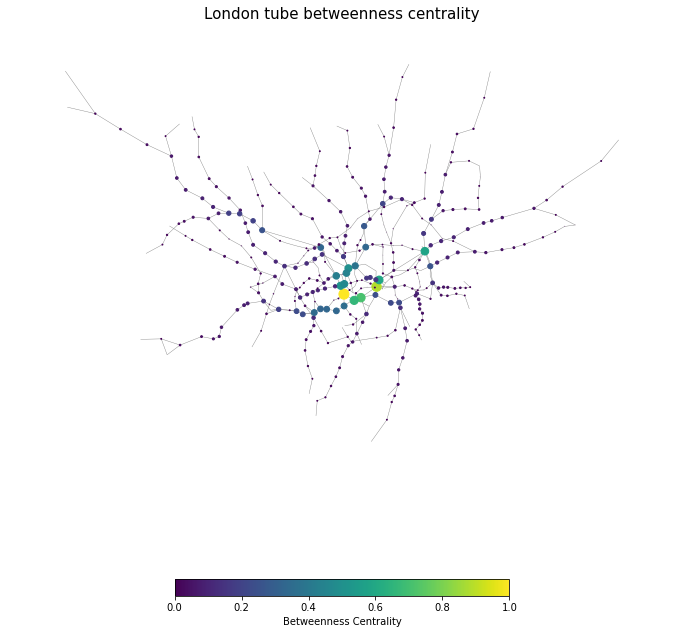

In [398]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G2.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G2.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G2.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

II.2.

II.3.

In [399]:
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:

maxbet1=[n for n in G1.nodes() if G1.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet1

['Stratford']

In [400]:
G1.remove_nodes_from(maxbet1)

In [401]:
# Number of existing nodes:
a =list(G1.nodes)
len(a)

400

##### Average Shortest Path

In [402]:
# Get the list of components:
components = nx.connected_components(G1)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G1.subgraph(largest_component)
# let's measure the clustering  coefficient
c_asp = nx.average_shortest_path_length(Largest_subgraph)
print(f'avg average shortest path: {c_asp}')

avg average shortest path: 14.496447069006436


##### Unweighted Clustering Coefficent

In [403]:
# let's measure the clustering coefficient
c = nx.clustering(G1)
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


##### Impact

In [404]:
# ASP before remove
G1_new = G.copy()
# let's measure the clustering  coefficient
c1_asp = nx.average_shortest_path_length(G1_new)
print(f'avg average shortest path: {c1_asp}')

avg average shortest path: 13.545997506234414


In [405]:
# ACC before remove
# let's measure the clustering coefficient
c1 = nx.clustering(G1_new)
print(type(c1))

# we can sort the dictionary by the clustering coefficient
c1 = sorted(c1.items(), key=lambda pair: pair[1], reverse=True)
print(c1[:5])

#what is the average clustering coefficient
c1_avg = sum([i[1] for i in c1]) / len(c1)
print(f'avg clustering coefficient: {c1_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


In [406]:
# Impact unweighted with ASP
print(((14.496447069006436-13.545997506234414)/13.545997506234414)*100)

7.0164604883072395


In [407]:
# Impact unweighted with ACC
print(((0.030624999999999982-0.030382377389858668)/0.030382377389858668)*100)

0.7985636114911101


#### Adjust betweenness

##### Average Shortest Path

In [408]:
# WASP before remove
c2_asp = nx.average_shortest_path_length(G2, weight='inv_weights')
print(f'avg average shortest path: {c2_asp}')

avg average shortest path: 0.0008114665523690714


##### Weighted Clustering Coefficent

In [409]:
# WACC before remove
# let's measure the clustering coefficient
c2 = nx.clustering(G2, weight='inv_weights')
print(type(c2))

# we can sort the dictionary by the clustering coefficient
c2 = sorted(c2.items(), key=lambda pair: pair[1], reverse=True)
print(c2[:5])

#what is the average clustering coefficient
c2_avg = sum([i[1] for i in c2]) / len(c2)
print(f'avg clustering coefficient: {c2_avg}')

<class 'dict'>
[('Heathrow Terminal 4', 0.07219595607522387), ('Star Lane', 0.030859382155427377), ('Hatton Cross', 0.02406531869174129), ('Heathrow Terminals 2 & 3', 0.02406531869174129), ('Chiswick Park', 0.022274110009482557)]
avg clustering coefficient: 0.0007040271862679714


In [410]:
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:

maxbet2=[n for n in G2.nodes() if G2.nodes[n]['betweenness_w'] == max(betweenness_w_values)]
maxbet2

['Green Park']

In [411]:
G2.remove_nodes_from(maxbet2)

In [412]:
# Number of existing nodes:
b =list(G2.nodes)
len(b)

400

##### Average Shortest Path

In [413]:
# Get the list of components:
components = nx.connected_components(G2)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G2.subgraph(largest_component)
# let's measure the clustering  coefficient
c_asp = nx.average_shortest_path_length(G2, weight='inv_weights')
print(f'avg average shortest path: {c_asp}')

avg average shortest path: 0.0008390851253132848


##### Weighted Clustering Coefficent

In [414]:
# let's measure the clustering coefficient
c = nx.clustering(G2, weight='inv_weights')
print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('Heathrow Terminal 4', 0.07219595607522387), ('Star Lane', 0.030859382155427377), ('Hatton Cross', 0.02406531869174129), ('Heathrow Terminals 2 & 3', 0.02406531869174129), ('Chiswick Park', 0.022274110009482557)]
avg clustering coefficient: 0.0007097950736125578


In [415]:
# Check the impact from removing ()
# Impact weighted with WASP
print(((0.0008390851253132848-0.0008114665523690714)/0.0008114665523690714)*100)

3.4035380587876447


In [416]:
# Impact weighted with WACC
print(((0.0007097950736125578-0.0007040271862679714)/0.0007040271862679714)*100)

0.8192705419746414


# Part 2: Spatial Interaction models

### III. Models and calibration

#### III.1.

#### III.2.

In [417]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [418]:
cdata = pd.read_csv("london_flows.csv")

In [419]:
cdata = cdata.drop(cdata[cdata['population']==0].index)
cdata = cdata.drop(cdata[cdata['jobs']==0].index)
cdata = cdata.drop(cdata[cdata['distance']==0].index)
cdata = cdata.drop(cdata[cdata['flows']==0].index)

In [420]:
cdata

,station_origin,station_destination,flows,population,jobs,distance
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [421]:
#the data needs to be ordered by borough code, if it's not then we will run into problems when we try to merge the 
#distance data back in later
cdata.sort_values(by=["station_origin", "station_destination"], inplace = True)

#reset the resulting index (important for later) when merging back together
cdata.reset_index(inplace=True)
cdata.drop(columns = ["index"], inplace=True)

## Estimating Model Parameters

In [422]:
#first we create a new total column which excludes intra-borough flow totals
cdata["TotalNoIntra"] = cdata.apply(lambda x: 0 if x['station_origin'] == x['station_destination'] else x['flows'], axis=1)

#set the number to a very small number
cdata["offset"]= cdata.apply(lambda x: 0.0000000001 if x['station_origin'] == x['station_destination'] else 0, axis=1)

In [423]:
cdata

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset
0,Abbey Road,Beckton,1,599,442,8510.121774,1,0
1,Abbey Road,Blackwall,3,599,665,3775.448872,3,0
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0
3,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,1,0
...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,0
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,0
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,0
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,0


In [424]:
import numpy as np
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
cdatamat = pd.pivot_table(cdata, values ="TotalNoIntra", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,NaN,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3745
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2886
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,24.0,NaN,NaN,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093


## Estimating Model Parameters

Text(0, 0.5, 'Total Flows')

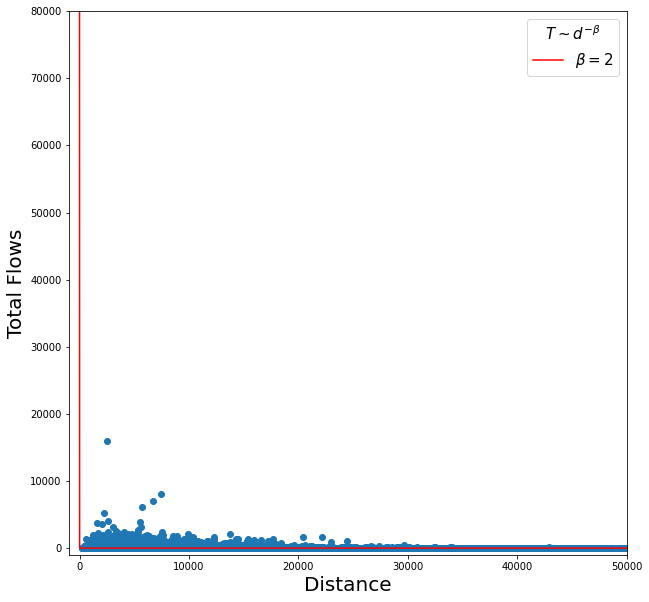

In [425]:
#first plot the Total commuter flows denoted by T against distance denoted by d
#and then fit a model line T ~ d^-beta with beta=2

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = cdata["distance"], y=cdata["flows"])
#line plot
line = np.arange(0.0002, 50_000, 0.1)
ax.plot(line, line**-2, color ="r", label = "$\\beta=2$")
#add a legend
ax.legend(title = "$T \\sim d^{-\\beta}$", fontsize = 15, title_fontsize=15)
#axis limits
ax.set_xlim([-1000,50000])
ax.set_ylim([-1000, 80000])
#set the labels
ax.set_xlabel("Distance", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'Total Flows')

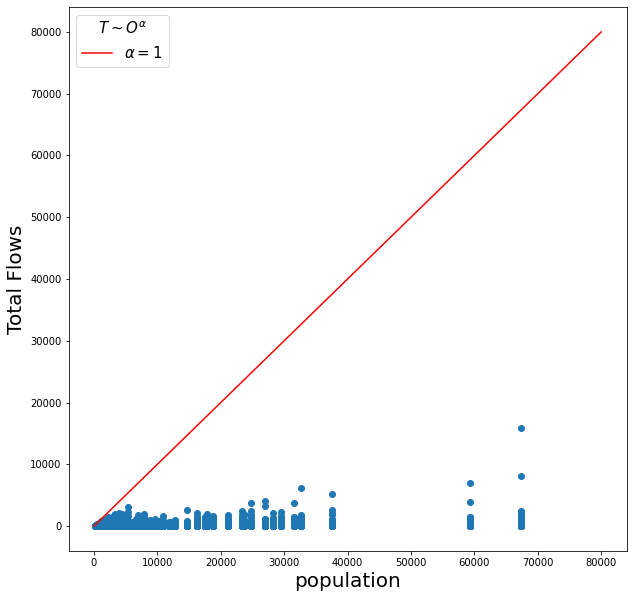

In [426]:
#Let us now look at the behaviour of the flows with respect to the population at the origin denoted by O
#and then fit a model line T ~ O^alpha, for alpha=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = cdata["population"], y=cdata["flows"])
#line plot
line = np.arange(0.0002, 80000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\alpha=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim O^{\\alpha}$", title_fontsize=15)
#axis labels
ax.set_xlabel("population", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'Total')

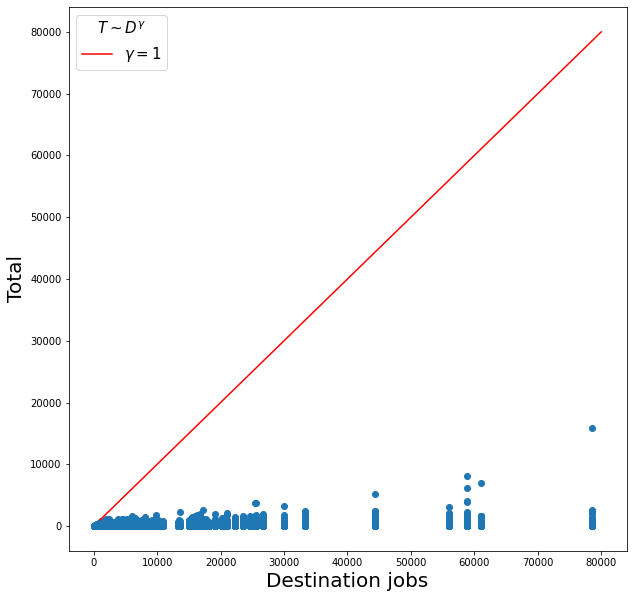

In [427]:
#Now let us look at the behaviour of the flows with respect to the salaries at destination denoted by D
# and then fit a model line  T ~ D^gamma. We will fit a line for gamma=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = cdata["jobs"], y=cdata["flows"])
#line plot
line = np.arange(1000, 80000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\gamma=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim D^{\\gamma}$", title_fontsize=15)
#axis labels
ax.set_xlabel("Destination jobs", fontsize = 20)
ax.set_ylabel("Total", fontsize = 20)

In [428]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(cdata["flows"])
T2

1542283

In [429]:
Oi1_alpha = cdata["population"]**alpha
Dj2_gamma = cdata["jobs"]**gamma
dist_beta = cdata["distance"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)
k

13.64809935987618

In [430]:
#cdata = cdata.replace([np.inf, -np.inf], np.nan)

#cdata = cdata.dropna()

In [431]:
#Oi1_alpha = cdata["population"]**alpha
#Dj2_gamma = cdata["jobs"]**gamma
#dist_beta = cdata["distance"]**-beta
#T1 = Oi1_alpha*Dj2_gamma*dist_beta
#k = T2/sum(T1)

In [432]:
cdata = cdata.dropna()
cdata = cdata.replace(np.inf, np.nan)
#run the model and store of the new flow estimates in a new column
cdata["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
cdata = cdata.replace(np.inf, np.nan)
#convert to integers
cdata["unconstrainedEst1"] = cdata["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(cdata["unconstrainedEst1"])
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43945 entries, 0 to 43944
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       43945 non-null  object 
 1   station_destination  43945 non-null  object 
 2   flows                43945 non-null  int64  
 3   population           43945 non-null  int64  
 4   jobs                 43945 non-null  int64  
 5   distance             43945 non-null  float64
 6   TotalNoIntra         43945 non-null  int64  
 7   offset               43945 non-null  int64  
 8   unconstrainedEst1    43945 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 3.0+ MB


Now we can create some flow estimates using equation 2 above... Begin by applying the parameters to the variables:

Then, just as in Equation 2 above, just multiply everything together to get your flow estimates.

In [433]:
#cdata = cdata.replace([np.inf, -np.inf], np.nan)
#cdata = cdata.dropna()
#run the model and store of the new flow estimates in a new column
#cdata["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
#cdata["unconstrainedEst1"] = cdata["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
#sum(cdata["unconstrainedEst1"])
#cdata.info()

In [434]:
cdatamat1 = cdata.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,559
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN,2.0,...,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,596
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,9750
Aldgate East,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,...,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,7907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,329
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216


In [435]:
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,NaN,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3745
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2886
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,24.0,NaN,NaN,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093


### R-Squared

In [436]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(cdata["flows"], cdata["unconstrainedEst1"])

0.03381700542510145

### Root Mean Squared Error (RMSE)

In [437]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(cdata["flows"], cdata["unconstrainedEst1"])

581.986

#### Improving our model: 1 -  calibrating parameters

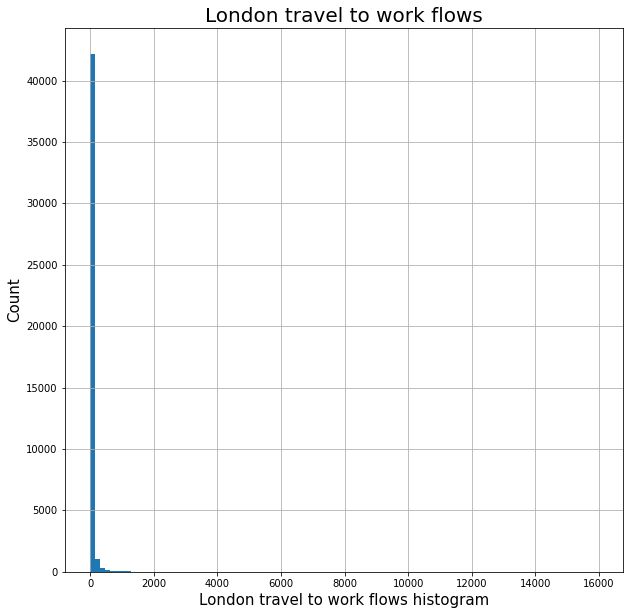

In [438]:
plt.subplots(figsize=(10,10))

plt.hist(cdata["flows"], histtype="stepfilled" , bins = 100)
plt.xlabel("London travel to work flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel to work flows", fontsize = 20)
plt.grid(True)

Text(0, 0.5, 'log(flows)')

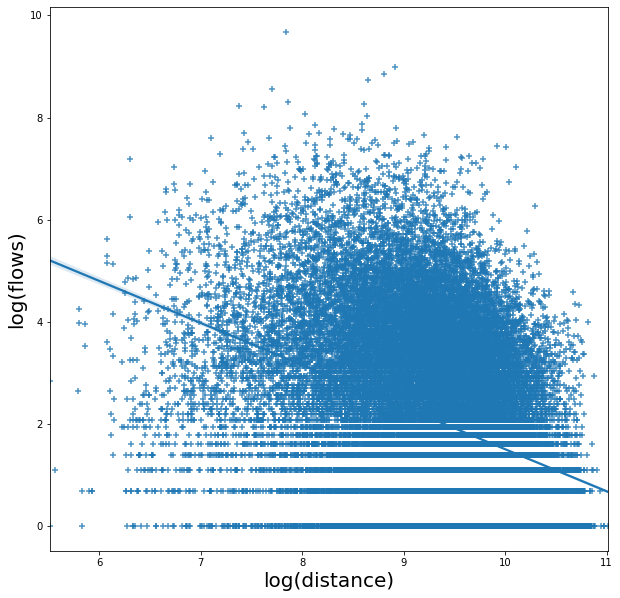

In [439]:
#subset the dataframe to the flows we want
cdata_flows = cdata[["flows", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
cdata_flows = cdata_flows[(cdata_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(cdata_flows["distance"])
y = np.log(cdata_flows["flows"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(distance)", fontsize = 20)
ax.set_ylabel("log(flows)", fontsize = 20)

#### The Poisson Regression Spatial Interaction Model

In [440]:
cdata = cdata.drop(cdata[cdata['population']==0].index)
cdata = cdata.drop(cdata[cdata['jobs']==0].index)
cdata = cdata.drop(cdata[cdata['distance']==0].index)
cdata = cdata.drop(cdata[cdata['flows']==0].index)

In [441]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdata[f"log_{x}"] = np.log(cdata[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdata, 
                  family=sm.families.Poisson()).fit()

In [442]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                43945
Model:                            GLM   Df Residuals:                    43941
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1675e+06
Date:                Tue, 17 May 2022   Deviance:                   2.1627e+06
Time:                        05:34:50   Pearson chi2:                 4.13e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0646      0.014   -223.

In [443]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdata["unconstrainedEst2"] = np.exp(K 
                                       + alpha*cdata["log_population"] 
                                       + gamma*cdata["log_jobs"] 
                                       - beta*cdata["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdata["fitted"] = predictions_summary_frame["mean"]

In [444]:
uncosim.mu

array([ 1.33185192,  2.88212504, 56.51864264, ...,  7.0022738 ,
       17.38163883, 15.21476603])

In [445]:
#round the numbers so that we don't get a half of a person
cdata["unconstrainedEst2"] = round(cdata["unconstrainedEst2"], 0)
#convert to integers
cdata["unconstrainedEst2"] = cdata["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(cdata["unconstrainedEst2"])

1542307

In [446]:
#turn it into a little matrix and have a look at your handy work
cdatamat2 = cdata.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,371
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315
Acton Town,NaN,NaN,NaN,24.0,24.0,NaN,9.0,NaN,NaN,26.0,...,22.0,4.0,8.0,14.0,NaN,NaN,NaN,NaN,NaN,4045
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,...,NaN,NaN,10.0,8.0,NaN,NaN,NaN,NaN,NaN,5381
Aldgate East,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,...,17.0,NaN,NaN,8.0,NaN,4.0,NaN,4.0,NaN,6288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,8.0,30.0,32.0,NaN,NaN,NaN,NaN,28.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,3943
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
Woodside Park,NaN,NaN,7.0,21.0,21.0,NaN,NaN,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2848


In [447]:
#compare it to the actual flows
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,NaN,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3745
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2886
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,24.0,NaN,NaN,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [448]:
CalcRSqaured(cdata["flows"], cdata["unconstrainedEst2"])

0.3114155959170229

In [449]:
CalcRMSE(cdata["flows"], cdata["unconstrainedEst2"])

128.175

In [450]:
cdata

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset,unconstrainedEst1,log_population,log_jobs,log_distance,unconstrainedEst2,fitted
0,Abbey Road,Beckton,1,599,442,8510.121774,1,0,0,6.395262,6.091310,9.049012,1,1.331852
1,Abbey Road,Blackwall,3,599,665,3775.448872,3,0,0,6.395262,6.499787,8.236275,3,2.882125
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0,19,6.395262,10.981421,8.534348,57,56.518643
3,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0,25,6.395262,9.643939,7.709274,36,36.062256
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,1,0,0,6.395262,7.096721,8.807842,3,3.120065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,0,2,8.973605,8.114325,9.503144,25,25.463983
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,0,8,8.973605,8.610137,9.071245,47,46.695352
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,0,0,8.973605,5.991465,9.162905,7,7.002274
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,0,3,8.973605,6.794587,8.585832,17,17.381639


#### Unconstrained model

In [451]:
#create the formula
formula_uncons = 'flows ~ log_population + log_jobs + log_distance'  #dis
#run the regression
unconsim = smf.glm(formula = formula_uncons, data=cdata, family=sm.families.Poisson()).fit()
# print(uncosim.summary())

formula_uncons1 = 'flows ~ log_population + log_jobs + distance'  #dis
unconsim1 = smf.glm(formula = formula_uncons1, data=cdata, family=sm.families.Poisson()).fit()
#print(uncosim1.summary())

In [452]:
#inverse power function
prediction_uncons =unconsim.get_prediction(cdata[["log_population", "log_jobs", "log_distance"]])
predictionsf_uncons = prediction_uncons.summary_frame()
cdata["unconsimest"] = round(predictionsf_uncons["mean"],0)

#negative exponential function
prediction_uncons1 =unconsim1.get_prediction(cdata[["log_population", "log_jobs", "distance"]])
predictionsf_uncons1 = prediction_uncons1.summary_frame()
cdata["unconsimest1"] = round(predictionsf_uncons1["mean"],0)

In [453]:
#ip
beta_uncons = uncosim.params[-1]
R2_uncons = CalcRSqaured(cdata["flows"], cdata["unconsimest"])
RMSE_uncons = CalcRMSE(cdata["flows"], cdata["unconsimest"])
print(f'beta : {beta_uncons}')
print(R2_uncons)
print(RMSE_uncons)

#ne
beta_uncons1 = unconsim1.params[-1]
R2_uncons1 = CalcRSqaured(cdata["flows"], cdata["unconsimest1"])
RMSE_uncons1 = CalcRMSE(cdata["flows"], cdata["unconsimest1"])
print(R2_uncons1)
print(RMSE_uncons1)

beta : -0.59614730547631
0.3114155959170229
128.175
0.3477441025461225
125.75


#### Production-constrained Model

In [454]:
formula_ori = 'flows ~  station_origin + log_jobs + log_distance -1' 
orisim = smf.glm(formula = formula_ori, data=cdata, family=sm.families.Poisson()).fit()
#print(prodsim.summary())

formula_ori1 = 'flows ~ station_origin + log_jobs + distance -1' 
orisim1 = smf.glm(formula = formula_ori1, data=cdata, family=sm.families.Poisson()).fit()
#print(prodsim.summary())

In [455]:
#inverse power function
prediction_ori =orisim.get_prediction(cdata[["station_origin", "log_jobs", "log_distance"]])
predictionsf_ori = prediction_ori.summary_frame()
cdata["orisimest"] = round(predictionsf_ori["mean"],0)

#negative exponential function
prediction_ori1 =orisim1.get_prediction(cdata[["station_origin", "log_jobs", "distance"]])
predictionsf_ori1 = prediction_ori1.summary_frame()
cdata["orisimest1"] = round(predictionsf_ori1["mean"],0)

In [456]:
#ip
beta_ori = uncosim.params[-1]
R2_ori = CalcRSqaured(cdata["flows"], cdata["orisimest"])
RMSE_ori = CalcRMSE(cdata["flows"], cdata["orisimest"])
#print(f'beta : {beta_ori}')
print(R2_ori)
print(RMSE_ori)

#ne
beta_ori1 = orisim1.params[-1]
R2_ori1 = CalcRSqaured(cdata["flows"], cdata["orisimest1"])
RMSE_ori1 = CalcRMSE(cdata["flows"], cdata["orisimest1"])
print(R2_ori1)
print(RMSE_ori1)

0.39372592328634215
120.147
0.46451380602588255
113.556


In [457]:
cdata

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset,unconstrainedEst1,log_population,log_jobs,log_distance,unconstrainedEst2,fitted,unconsimest,unconsimest1,orisimest,orisimest1
0,Abbey Road,Beckton,1,599,442,8510.121774,1,0,0,6.395262,6.091310,9.049012,1,1.331852,1.0,2.0,1.0,2.0
1,Abbey Road,Blackwall,3,599,665,3775.448872,3,0,0,6.395262,6.499787,8.236275,3,2.882125,3.0,4.0,4.0,5.0
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0,19,6.395262,10.981421,8.534348,57,56.518643,57.0,70.0,76.0,115.0
3,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0,25,6.395262,9.643939,7.709274,36,36.062256,36.0,36.0,56.0,66.0
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,1,0,0,6.395262,7.096721,8.807842,3,3.120065,3.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,0,2,8.973605,8.114325,9.503144,25,25.463983,25.0,27.0,132.0,107.0
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,0,8,8.973605,8.610137,9.071245,47,46.695352,47.0,56.0,269.0,301.0
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,0,0,8.973605,5.991465,9.162905,7,7.002274,7.0,9.0,37.0,40.0
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,0,3,8.973605,6.794587,8.585832,17,17.381639,17.0,22.0,106.0,131.0


#### Attraction-Constrained Model

In [458]:
formula_des = 'flows ~ station_destination + log_population + log_distance -1' 
dessim = smf.glm(formula = formula_des, data=cdata, family=sm.families.Poisson()).fit()
# print(attrsim.summary())

formula_des1 = 'flows ~ station_destination + log_population + distance -1' 
dessim1 = smf.glm(formula = formula_des1, data=cdata, family=sm.families.Poisson()).fit()
# print(attrsim1.summary())

In [459]:
#ip
predictiondes =dessim.get_prediction(cdata[["station_destination", "log_population", "log_distance"]])
predictionsf_des = predictiondes.summary_frame()
cdata["dessimest"] = round(predictionsf_des["mean"],0)

#ne
predictiondes1 =dessim1.get_prediction(cdata[["station_destination", "log_population", "distance"]])
predictionsf_des1 = predictiondes1.summary_frame()
cdata["dessimest1"] = round(predictionsf_des1["mean"],0)

In [460]:
#ip
beta_des = dessim.params[-1]
R2_des = CalcRSqaured(cdata["flows"], cdata["dessimest"])
RMSE_des = CalcRMSE(cdata["flows"], cdata["dessimest"])
print(R2_des)
print(RMSE_des)

#ne
beta_des1 = dessim.params[-1]
R2_des1 = CalcRSqaured(cdata["flows"], cdata["dessimest1"])
RMSE_des1 = CalcRMSE(cdata["flows"], cdata["dessimest1"])
print(R2_des1)
print(RMSE_des1)

0.34823921191707763
124.587
0.3951090877869879
120.597


#### Doubly Constrained Model

In [461]:
formula_doub = 'flows ~ station_origin + station_destination + log_distance -1'
doubsim = smf.glm(formula = formula_doub, data=cdata, family=sm.families.Poisson()).fit()
# print(doubsim.summary())

formula_doub1 = 'flows ~ station_origin + station_destination + distance -1'
doubsim1 = smf.glm(formula = formula_doub1, data=cdata, family=sm.families.Poisson()).fit()
# print(doubsim.summary())

In [462]:
cdata["doubsimest"] = np.round(doubsim.predict()) 
cdata["doubsimest1"] = np.round(doubsim1.predict()) 

#ip
beta_doub = doubsim.params[-1]
R2_doub = CalcRSqaured(cdata["flows"], cdata["doubsimest"])
RMSE_doub = CalcRMSE(cdata["flows"], cdata["doubsimest"])
print(R2_doub)
print(RMSE_doub)
#ne 
beta_doub1 = doubsim1.params[-1]
R2_doub1 = CalcRSqaured(cdata["flows"], cdata["doubsimest1"])
RMSE_doub1 = CalcRMSE(cdata["flows"], cdata["doubsimest1"])
print(R2_doub1)
print(RMSE_doub1)

0.41893772760573345
117.622
0.4997778698538133
109.598


#### Plots of SIM

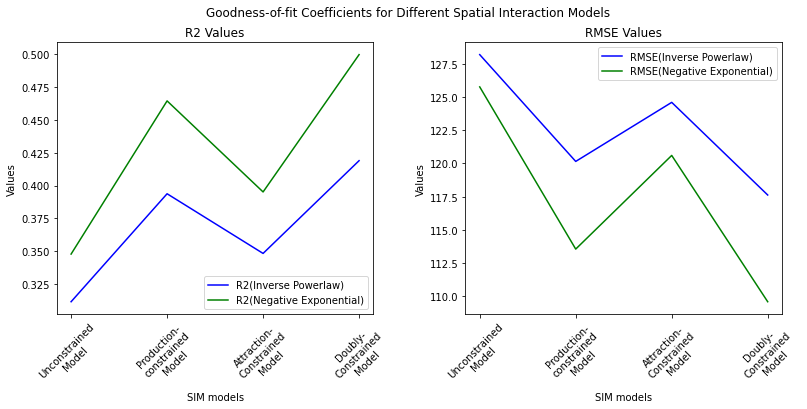

In [463]:
beta_ip = [beta_uncons,beta_ori,beta_des,beta_doub]
R2_ip = [R2_uncons,R2_ori,R2_des,R2_doub]
RMSE_ip = [RMSE_uncons,RMSE_ori,RMSE_des,RMSE_doub]

beta_ne = [beta_uncons1,beta_ori1,beta_des1,beta_doub1]
R2_ne = [R2_uncons1,R2_ori1,R2_des1,R2_doub1]
RMSE_ne = [RMSE_uncons1,RMSE_ori1,RMSE_des1,RMSE_doub1]

xl = ["Unconstrained\nModel","Production-\nconstrained\nModel","Attraction-\nConstrained\nModel","Doubly-\nConstrained\nModel"]


fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Goodness-of-fit Coefficients for Different Spatial Interaction Models")
ax1 = ax[0]
ax2 = ax[1]
ax1.set_title('R2 Values') # of Different SIM models and Cost Functions
ax1.plot(R2_ip, color = "blue", label = 'R2(Inverse Powerlaw)') 
ax1.plot(R2_ne, color = "green", label = 'R2(Negative Exponential)') 
#ax1.grid(color='grey', linestyle='--',alpha=0.3) 
ax1.set_xlabel("SIM models") 
ax1.set_ylabel("Values") 
ax1.set_xticks(list(range(0,4))) 
ax1.set_xticklabels(xl , rotation=45)
ax1.legend(loc='lower right')

ax2.set_title('RMSE Values') # of Different SIM models and Cost Functions
ax2.plot(RMSE_ip, color = "blue", label = 'RMSE(Inverse Powerlaw)') #,linestyle='--',alpha=0.3
ax2.plot(RMSE_ne, color = "green", label = 'RMSE(Negative Exponential)') #,linestyle='--',alpha=0.3
#ax2.grid(color='grey', linestyle='--',alpha=0.3) 
ax2.set_xlabel("SIM models") 
ax2.set_ylabel("Values") 
#ax1.right_ax.set_ylabel('RMSE Values') ###？？？？？    , secondary_y=True
#ax.set_ylim(0.5 ,1.0) #！！！！！！！！！！！！！！！！！
#ax.set_yticklabels(['50%','60%','70%','80%','90%','100%'])
ax2.set_xticks(list(range(0,4))) 
ax2.set_xticklabels(xl , rotation=45)
ax2.legend(loc='best')

fig.subplots_adjust(wspace=0.29,hspace=0.0)
plt.show()

In [464]:
#set out all the fomrulas
formula1 = "flows ~ np.log(population) + np.log(jobs) + np.log(distance) -1"
formula2 = "flows ~ station_origin + np.log(jobs) + np.log(distance) -1"
formula3 = "flows ~ np.log(population) + station_destination + np.log(distance) -1"
formula4 = "flows ~ station_origin + station_destination + np.log(distance) -1"
formula5 = "flows ~ np.log(population) + np.log(jobs) + distance -1"
formula6 = "flows ~ station_origin + np.log(jobs) + distance -1"
formula7 = "flows ~ np.log(population) + station_destination + distance -1"
formula8 = "flows ~ station_origin + station_destination + distance -1"

#create a list of all the formulas
formulas = [formula1, formula2, formula3, formula4, 
            formula5, formula6, formula7, formula8]

#list the models name
models = ["uncosim_pow", "prodsim_pow", "attrsim_pow", "doublesim_pow",
         "uncosim_exp", "prodsim_exp", "attrsim_exp", "doublesim_exp"]

#create a set of tuples to store whether a paramater
#will be in the model or not
model_params = [(True, True, True),
               (False, True, True),
               (True, False, True),
               (False, False, True),
               (True, True, True),
               (False, True, True),
               (True, False, True),
               (False, False, True)]

#create an ampty dictionary to store the results
results = {"Model":models,
          "R2": [],
          "RMSE": [],
          "Alpha":[],
          "Gamma":[],
          "Beta":[]}

#loop over each formula
for i, formula in enumerate(formulas):
    
    #run the specified model
    sim = smf.glm(formula = formula, 
                 data = cdata,
                 family = sm.families.Poisson()).fit()
    #clauclate the estimates
    cdata[models[i]] = sim.mu
    
    #if the alpha paramater is true
    if model_params[i][0] == True:
        
        #if there are three params then it will be 
        #in the third position
        if sum(model_params[i]) == 3:
            
            results["Alpha"].append(sim.params[-3])
            
        #otherwise it will be in the second paramater
        else:
            results["Alpha"].append(sim.params[-2])
            
    #if not then just append nan
    else:
        results["Alpha"].append(np.nan) 
    
    #if the gamma paramater is True
    #then it will always be the second paramater
    if model_params[i][1] == True:
        results["Gamma"].append(sim.params[-2])
    #otherwise add nan
    else:
        results["Gamma"].append(np.nan)
    
    #add the beta to the results (always will be there)
    results["Beta"].append(sim.params[-1])
        
    #add the metrics to the results dictionary
    results["R2"].append(CalcRSqaured(cdata["flows"],cdata[models[i]]))
    results["RMSE"].append(CalcRMSE(cdata["flows"],cdata[models[i]]))

#create a dataframe from the results
results = pd.DataFrame(results)
#print the results
results

,Model,R2,RMSE,Alpha,Gamma,Beta
0,uncosim_pow,0.251408,133.501,0.599264,0.612741,-0.749470
1,prodsim_pow,0.393730,120.146,NaN,0.730170,-0.815187
2,attrsim_pow,0.348251,124.586,0.715607,NaN,-0.606500
3,doublesim_pow,0.418926,117.623,NaN,NaN,-0.847360
4,uncosim_exp,0.178353,141.709,0.256156,0.333423,-0.000121
5,prodsim_exp,0.464517,113.556,NaN,0.725617,-0.000144
6,attrsim_exp,0.395106,120.597,0.688217,NaN,-0.000094
7,doublesim_exp,0.499812,109.594,NaN,NaN,-0.000145


### IV.1

### Production-constrained Model

In [465]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                43945
Model:                            GLM   Df Residuals:                    43545
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.1409e+05
Date:                Tue, 17 May 2022   Deviance:                   1.6560e+06
Time:                        05:44:10   Pearson chi2:                 2.41e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Create some $O_i$ and $D_j$ columns and store the total in and out flow matrix margins in them. 

##### 2.1 Model Estimates

In [466]:
cdata

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset,unconstrainedEst1,log_population,...,doubsimest,doubsimest1,uncosim_pow,prodsim_pow,attrsim_pow,doublesim_pow,uncosim_exp,prodsim_exp,attrsim_exp,doublesim_exp
0,Abbey Road,Beckton,1,599,442,8510.121774,1,0,0,6.395262,...,3.0,4.0,2.187787,1.406918,4.338397,3.155354,14.008166,2.023660,4.963744,4.338910
1,Abbey Road,Blackwall,3,599,665,3775.448872,3,0,0,6.395262,...,3.0,4.0,5.167056,3.677350,4.230828,3.306465,28.463379,5.375408,5.144218,4.376505
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0,19,6.395262,...,84.0,127.0,64.391949,76.062924,75.993812,84.074049,108.233268,115.047249,99.980157,127.407043
3,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0,25,6.395262,...,49.0,54.0,52.658433,56.123931,36.891409,48.854668,97.909390,65.731157,38.922249,54.162722
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,1,0,0,6.395262,...,4.0,6.0,4.853484,3.568414,6.114094,4.030917,24.422016,5.455203,7.820382,5.836399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,0,2,8.973605,...,249.0,183.0,25.209633,131.612217,84.385437,249.174081,29.454318,106.997459,74.480499,183.492430
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,0,8,8.973605,...,191.0,214.0,47.215665,268.799374,43.669603,191.004738,61.361618,301.318899,53.039974,214.185299
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,0,0,8.973605,...,20.0,27.0,8.859238,36.861579,7.625232,20.472899,23.164309,39.963216,10.700649,27.144455
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,0,3,8.973605,...,116.0,132.0,22.332996,106.060284,37.205404,115.985287,50.211794,130.547123,41.987548,132.033895


In [467]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdata ...then... group by station_origin ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdata = cdata.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdata.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdata = cdata.merge(D_j, on = "station_destination", how = "left" )

Now we want to fish the coefficients out of the prodSim glm object.

In [468]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdata = cdata.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdata.drop(columns = ["coef"], inplace = True)
#check this has worked
cdata

<ipython-input-468-d82bd92f525b>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset,unconstrainedEst1,log_population,...,prodsim_pow,attrsim_pow,doublesim_pow,uncosim_exp,prodsim_exp,attrsim_exp,doublesim_exp,O_i,D_j,alpha_i
0,Abbey Road,Beckton,1,599,442,8510.121774,1,0,0,6.395262,...,1.406918,4.338397,3.155354,14.008166,2.023660,4.963744,4.338910,599,442,3.270351
1,Abbey Road,Blackwall,3,599,665,3775.448872,3,0,0,6.395262,...,3.677350,4.230828,3.306465,28.463379,5.375408,5.144218,4.376505,599,665,3.270351
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0,19,6.395262,...,76.062924,75.993812,84.074049,108.233268,115.047249,99.980157,127.407043,599,58772,3.270351
3,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0,25,6.395262,...,56.123931,36.891409,48.854668,97.909390,65.731157,38.922249,54.162722,599,15428,3.270351
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,1,0,0,6.395262,...,3.568414,6.114094,4.030917,24.422016,5.455203,7.820382,5.836399,599,1208,3.270351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,0,2,8.973605,...,131.612217,84.385437,249.174081,29.454318,106.997459,74.480499,183.492430,7892,3342,6.701868
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,0,8,8.973605,...,268.799374,43.669603,191.004738,61.361618,301.318899,53.039974,214.185299,7892,5487,6.701868
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,0,0,8.973605,...,36.861579,7.625232,20.472899,23.164309,39.963216,10.700649,27.144455,7892,400,6.701868
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,0,3,8.973605,...,106.060284,37.205404,115.985287,50.211794,130.547123,41.987548,132.033895,7892,893,6.701868


In [469]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [470]:
alpha_i

station_origin[Abbey Road]          3.270351
station_origin[Acton Central]       5.008886
station_origin[Acton Town]          4.397394
station_origin[Aldgate]             3.361125
station_origin[Aldgate East]        3.408728
                                      ...   
station_origin[Wood Street]         5.672160
station_origin[Woodford]            4.955425
station_origin[Woodgrange Park]     5.320215
station_origin[Woodside Park]       4.496709
station_origin[Woolwich Arsenal]    6.701868
Length: 398, dtype: float64

In [471]:
gamma

0.7301699265793928

In [472]:
beta

0.8151874614788079

In [473]:
cdata["prodsimest1"] = np.exp(cdata["alpha_i"]+gamma*cdata["log_jobs"] 
                              - beta*cdata["log_distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
cdata.head(10)

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset,unconstrainedEst1,log_population,...,attrsim_pow,doublesim_pow,uncosim_exp,prodsim_exp,attrsim_exp,doublesim_exp,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Beckton,1,599,442,8510.121774,1,0,0,6.395262,...,4.338397,3.155354,14.008166,2.023660,4.963744,4.338910,599,442,3.270351,1.406918
1,Abbey Road,Blackwall,3,599,665,3775.448872,3,0,0,6.395262,...,4.230828,3.306465,28.463379,5.375408,5.144218,4.376505,599,665,3.270351,3.677350
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0,19,6.395262,...,75.993812,84.074049,108.233268,115.047249,99.980157,127.407043,599,58772,3.270351,76.062924
3,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0,25,6.395262,...,36.891409,48.854668,97.909390,65.731157,38.922249,54.162722,599,15428,3.270351,56.123931
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,1,0,0,6.395262,...,6.114094,4.030917,24.422016,5.455203,7.820382,5.836399,599,1208,3.270351,3.568414
5,Abbey Road,Cutty Sark,2,599,1748,8503.898909,2,0,0,6.395262,...,9.023814,5.505967,22.171816,5.492955,10.752272,7.660433,599,1748,3.270351,3.841726
6,Abbey Road,Cyprus,7,599,850,6532.099618,7,0,0,6.395262,...,6.585355,4.827610,22.130744,4.321986,7.554172,6.476352,599,850,3.270351,2.813752
7,Abbey Road,Devons Road,1,599,611,3958.324171,1,0,0,6.395262,...,4.375389,3.335744,27.065428,4.923879,5.104278,4.411670,599,611,3.270351,3.326081
8,Abbey Road,East India,2,599,1522,3384.141666,2,0,1,6.395262,...,9.912539,7.882652,39.331625,10.369665,11.527970,9.984373,599,1522,3.270351,7.359304
9,Abbey Road,Island Gardens,2,599,691,7706.296370,2,0,0,6.395262,...,3.767756,2.407495,17.919103,3.141409,4.676604,3.424519,599,691,3.270351,2.113923


##### 2.2 Assessing the model output

##### 2.2.1 The flow matrics

In [474]:
#first round the estimates
cdata["prodsimest1"] = round(cdata["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
cdatamat3 = cdata.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1225.0
Acton Town,NaN,NaN,NaN,20.0,20.0,NaN,10.0,NaN,NaN,22.0,...,18.0,4.0,6.0,14.0,NaN,NaN,NaN,NaN,NaN,3750.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,2889.0
Aldgate East,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,6.0,NaN,NaN,3.0,NaN,1.0,NaN,1.0,NaN,3176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,8.0,37.0,41.0,NaN,NaN,NaN,NaN,34.0,...,17.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4870.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,6.0,22.0,22.0,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [475]:
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,NaN,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3745
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2886
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,24.0,NaN,NaN,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093


##### 2.2.2 How do the fits compare with the unconstrained model from last time?

In [476]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(cdata["flows"], cdata["prodsimest1"])

0.39372592328634215

In [477]:
CalcRMSE(cdata["flows"], cdata["prodsimest1"])

120.147

### IV.1. Scenario A:

In [478]:
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = 0.5*row["jobs"]
    else:
        val = row["jobs"]
    return val
        
cdata["jobScenario"] = cdata.apply(new_jobs, axis =1)
cdata.head(10)

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset,unconstrainedEst1,log_population,...,doublesim_pow,uncosim_exp,prodsim_exp,attrsim_exp,doublesim_exp,O_i,D_j,alpha_i,prodsimest1,jobScenario
0,Abbey Road,Beckton,1,599,442,8510.121774,1,0,0,6.395262,...,3.155354,14.008166,2.023660,4.963744,4.338910,599,442,3.270351,1.0,442.0
1,Abbey Road,Blackwall,3,599,665,3775.448872,3,0,0,6.395262,...,3.306465,28.463379,5.375408,5.144218,4.376505,599,665,3.270351,4.0,665.0
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0,19,6.395262,...,84.074049,108.233268,115.047249,99.980157,127.407043,599,58772,3.270351,76.0,29386.0
3,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0,25,6.395262,...,48.854668,97.909390,65.731157,38.922249,54.162722,599,15428,3.270351,56.0,15428.0
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,1,0,0,6.395262,...,4.030917,24.422016,5.455203,7.820382,5.836399,599,1208,3.270351,4.0,1208.0
5,Abbey Road,Cutty Sark,2,599,1748,8503.898909,2,0,0,6.395262,...,5.505967,22.171816,5.492955,10.752272,7.660433,599,1748,3.270351,4.0,1748.0
6,Abbey Road,Cyprus,7,599,850,6532.099618,7,0,0,6.395262,...,4.827610,22.130744,4.321986,7.554172,6.476352,599,850,3.270351,3.0,850.0
7,Abbey Road,Devons Road,1,599,611,3958.324171,1,0,0,6.395262,...,3.335744,27.065428,4.923879,5.104278,4.411670,599,611,3.270351,3.0,611.0
8,Abbey Road,East India,2,599,1522,3384.141666,2,0,1,6.395262,...,7.882652,39.331625,10.369665,11.527970,9.984373,599,1522,3.270351,7.0,1522.0
9,Abbey Road,Island Gardens,2,599,691,7706.296370,2,0,0,6.395262,...,2.407495,17.919103,3.141409,4.676604,3.424519,599,691,3.270351,2.0,691.0


In [479]:
cdata["prodsimest2"] = np.exp(cdata["alpha_i"]+gamma*np.log(cdata["jobScenario"]) - beta*cdata["log_distance"])

cdata["prodsimest2"] = round(cdata["prodsimest2"],0)
#now we can convert the pivot table into a matrix
cdatamat4 = cdata.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,571.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1225.0
Acton Town,NaN,NaN,NaN,20.0,20.0,NaN,10.0,NaN,NaN,22.0,...,18.0,4.0,6.0,14.0,NaN,NaN,NaN,NaN,NaN,3720.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,2862.0
Aldgate East,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,6.0,NaN,NaN,3.0,NaN,1.0,NaN,1.0,NaN,3141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,8.0,37.0,41.0,NaN,NaN,NaN,NaN,34.0,...,17.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4799.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,6.0,22.0,22.0,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3061.0


In [480]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = cdata["jobs"]**gamma
dist_beta = cdata["distance"]**-beta
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

So that is it for calculating your $A_i$ values. Now you have these, it’s very simple to plug everything back into Equation 1 and generate some estimates…

In [481]:
#to check everything works, recreate the original estimates
cdata["prodsimest3"] = cdata["A_i"]*cdata["O_i"]*Dj2_gamma*dist_beta
#round
cdata["prodsimest3"] = round(cdata["prodsimest3"])
#check
cdata[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,1.0,1.0
1,4.0,4.0
2,76.0,76.0
3,56.0,56.0
4,4.0,4.0
...,...,...
43940,132.0,132.0
43941,269.0,269.0
43942,37.0,37.0
43943,106.0,106.0


You should see that your new estimates are exactly the same as your first estimates. If they’re not, then something has gone wrong. Now we have this though, we can keep messing around with some new estimates and keep the constraints. Remember, though, that you will need to recalculate $A_i$ each time you want to create a new set of estimates. Let’s try with our new values for the destination salary in Barking and Dagenham

In [482]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = cdata["jobScenario"]**gamma
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [483]:
#to check everything works, recreate the original estimates
cdata["prodsimest4"] = cdata["A_i2"]*cdata["O_i"]*Dj3_gamma*dist_beta
#round
cdata["prodsimest4"] = round(cdata["prodsimest4"])

In [484]:
cdatamat5 = cdata.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1225.0
Acton Town,NaN,NaN,NaN,20.0,20.0,NaN,10.0,NaN,NaN,22.0,...,18.0,4.0,6.0,14.0,NaN,NaN,NaN,NaN,NaN,3746.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,...,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,2886.0
Aldgate East,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,...,6.0,NaN,NaN,3.0,NaN,2.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,9.0,38.0,41.0,NaN,NaN,NaN,NaN,35.0,...,17.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,6.0,22.0,22.0,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [485]:
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,NaN,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3745
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2886
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,24.0,NaN,NaN,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [486]:
diff = pd.DataFrame(cdata, columns=['station_origin', 'station_destination', 'flows', 'prodsimest1', 'prodsimest4'])

In [487]:
diff_flow = diff.groupby('station_destination',as_index=False).sum({'flows':'sum','prodsimest1':'sum','prodsimest4':'sum'})
#diff_flow.reset_index(level=0, inplace=True)
diff_flow["diff"] = diff_flow["prodsimest4"]-diff_flow["flows"]
diff_flow["diff1"] = diff_flow["prodsimest4"]-diff_flow["prodsimest1"]
#相减完之后取绝对值
#diff_flow["diff"] = abs(diff_flow["diff"])
#diff_flow["diff1"] = abs(diff_flow["diff1"])
#按照绝对值大小排序，提一下哪些流失的比较大
diff_flow.sort_values(by=["diff1"],ascending= False, inplace = True)
diff_flow2 = diff_flow
diff_flow2

,station_destination,flows,prodsimest1,prodsimest4,diff,diff1
15,Bank and Monument,78549,69789.0,71349.0,-7200.0,1560.0
326,Stratford,55954,60765.0,61950.0,5996.0,1185.0
55,Canning Town,15428,16917.0,17581.0,2153.0,664.0
212,Liverpool Street,61122,62919.0,63362.0,2240.0,443.0
251,Oxford Circus,44368,37564.0,37913.0,-6455.0,349.0
...,...,...,...,...,...,...
156,Hatch End,93,35.0,35.0,-58.0,0.0
245,Norwood Junction,406,265.0,265.0,-141.0,0.0
105,Eastcote,364,248.0,248.0,-116.0,0.0
301,South Hampstead,236,79.0,79.0,-157.0,0.0


In [488]:
#相减完之后取绝对值
diff_flow["diff"] = abs(diff_flow["diff"])
diff_flow["diff1"] = abs(diff_flow["diff1"])
#按照绝对值大小排序，提一下哪些流失的比较大
diff_flow.sort_values(by=["diff1"],ascending= False, inplace = True)
diff_flow1 = diff_flow
diff_flow1

,station_destination,flows,prodsimest1,prodsimest4,diff,diff1
54,Canary Wharf,58772,49645.0,31421.0,27351.0,18224.0
15,Bank and Monument,78549,69789.0,71349.0,7200.0,1560.0
326,Stratford,55954,60765.0,61950.0,5996.0,1185.0
55,Canning Town,15428,16917.0,17581.0,2153.0,664.0
212,Liverpool Street,61122,62919.0,63362.0,2240.0,443.0
...,...,...,...,...,...,...
395,Woodgrange Park,242,146.0,146.0,96.0,0.0
215,London Fields,790,609.0,609.0,181.0,0.0
239,North Wembley,365,265.0,265.0,100.0,0.0
191,Kenton,768,341.0,341.0,427.0,0.0


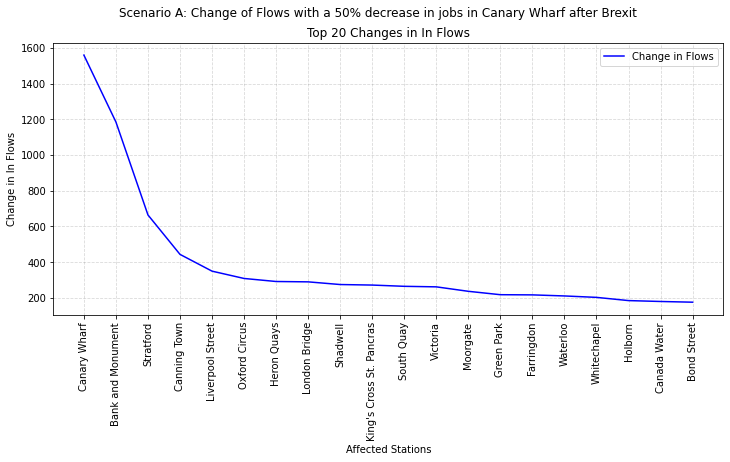

In [489]:
#plot for the SA
fig, ax = plt.subplots(1,1,figsize=(12,5))
fig.suptitle("Scenario A: Change of Flows with a 50% decrease in jobs in Canary Wharf after Brexit") #Decrease in Canary Wharf's jobs
ax.plot(list(diff_flow['diff1'])[1:21], color = "blue", label = 'Change in Flows') 
ax.grid(color='grey', linestyle='--',alpha=0.3) 
ax.set_xlabel("Affected Stations") 
ax.set_ylabel("Change in In Flows")
ax.set_xticks(list(range(20))) 
ax.set_xticklabels(list(diff_flow['station_destination'])[0:20], rotation=90)
ax.legend(loc=1)
ax.set_title('Top 20 Changes in In Flows')
plt.show()

### IV.2. Scenario B

#### Product

In [490]:
#create the formula (the "-1" indicates no intercept in the regression model).
#formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
#prodSim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
#print(prodSim.summary())

In [491]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdata ...then... group by station_origin ...then... summarise by calculating the sum of Total
#O_i = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
#O_i.rename(columns={"flows":"O_i"}, inplace = True)
#cdata = cdata.merge(O_i, on = "station_origin", how = "left" )

#D_j = pd.DataFrame(cdata.groupby(["station_destination"])["flows"].agg(np.sum))
#D_j.rename(columns={"flows":"D_j"}, inplace = True)
#cdata = cdata.merge(D_j, on = "station_destination", how = "left" )

In [492]:
#We can do this by pulling out the parameter values
#coefs = pd.DataFrame(prodSim.params)
#coefs.reset_index(inplace=True)
#coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
#to_repl = ["(station_origin)", "\[", "\]"]
#for x in to_repl:
    #coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
#cdata = cdata.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
#cdata.drop(columns = ["coef"], inplace = True)
#check this has worked
#cdata

In [493]:
#alpha_i = prodSim.params[0:-2]
#gamma = prodSim.params[-2]
#beta = -prodSim.params[-1]

In [494]:
#alpha_i

In [495]:
#beta

In [496]:
#cdata.info()

In [497]:
#first round the estimates
#cdata["prodsimestB"] = round(cdata["prodsimestB"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
#cdatamatB = cdata.pivot_table(values ="prodsimestB", index="station_origin", columns = "station_destination",
                            #aggfunc=np.sum, margins=True)
#cdatamatB

In [498]:
beta

0.8151874614788079

In [499]:
#calculate some new wj^alpha and d_ij^beta values
#Dj4_gamma = cdata["jobs"]**gamma
#calcualte the first stage of the Ai values
#cdata["Ai2"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
#A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai2"].agg(np.sum))
#now divide into 1
#A_i["Ai2"] = 1/A_i["Ai2"]
#A_i.rename(columns={"Ai3":"A_i3"}, inplace=True)
#and write the A_i values back into the dataframe
#cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [500]:
#to check everything works, recreate the original estimates
#cdata["prodsimestB1"] = cdata["A_i3"]*cdata["O_i"]*Dj3_gamma*dist_beta
#round
#cdata["prodsimestB1"] = round(cdata["prodsimestB1"])

#### beta=1.5

In [501]:
#calculate some new wj^alpha and d_ij^beta values
Dj4_gamma = cdata["jobs"]**gamma
dist_beta1 = cdata["distance"]**(-1.5)
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj4_gamma * dist_beta1
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_iB1"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [502]:
#to check everything works, recreate the original estimates
cdata["prodsimestB1"] = cdata["A_iB1"]*cdata["O_i"]*Dj4_gamma*dist_beta1
#round
cdata["prodsimestB1"] = round(cdata["prodsimestB1"])

In [503]:
cdatamatB1 = cdata.pivot_table(values ="prodsimestB1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamatB1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,15.0,NaN,NaN,15.0,...,13.0,3.0,3.0,18.0,NaN,NaN,NaN,NaN,NaN,3743.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2884.0
Aldgate East,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,1.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,3168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,5.0,36.0,42.0,NaN,NaN,NaN,NaN,31.0,...,10.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,4865.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,4.0,19.0,19.0,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


#### beta=2

In [504]:
#calculate some new wj^alpha and d_ij^beta values
Dj5_gamma = cdata["jobs"]**gamma
dist_beta2 = cdata["distance"]**(-2)
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj5_gamma * dist_beta2
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_iB2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [505]:
#to check everything works, recreate the original estimates
cdata["prodsimestB2"] = cdata["A_iB2"]*cdata["O_i"]*Dj5_gamma*dist_beta2
#round
cdata["prodsimestB2"] = round(cdata["prodsimestB2"])

In [506]:
cdatamatB2 = cdata.pivot_table(values ="prodsimestB2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamatB2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,8.0,8.0,NaN,16.0,NaN,NaN,9.0,...,8.0,2.0,2.0,17.0,NaN,NaN,NaN,NaN,NaN,3750.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2877.0
Aldgate East,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,3.0,31.0,38.0,NaN,NaN,NaN,NaN,25.0,...,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4869.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,3.0,15.0,15.0,NaN,NaN,NaN,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3102.0


In [507]:
cdata

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset,unconstrainedEst1,log_population,...,prodsimest2,Ai1,A_i,prodsimest3,A_i2,prodsimest4,A_iB1,prodsimestB1,A_iB2,prodsimestB2
0,Abbey Road,Beckton,1,599,442,8510.121774,1,0,0,6.395262,...,1.0,1.179604e-06,0.043941,1.0,0.046275,1.0,6.300285,0.0,203.126743,0.0
1,Abbey Road,Blackwall,3,599,665,3775.448872,3,0,0,6.395262,...,4.0,8.076111e-06,0.043941,4.0,0.046275,4.0,6.300285,2.0,203.126743,1.0
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0,19,6.395262,...,46.0,1.173449e-04,0.043941,76.0,0.046275,48.0,6.300285,32.0,203.126743,14.0
3,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0,25,6.395262,...,56.0,2.301376e-04,0.043941,56.0,0.046275,59.0,6.300285,41.0,203.126743,28.0
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,1,0,0,6.395262,...,4.0,3.981421e-06,0.043941,4.0,0.046275,4.0,6.300285,1.0,203.126743,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,0,2,8.973605,...,132.0,2.083519e-06,0.103133,132.0,0.110775,141.0,52.512741,100.0,4670.797413,77.0
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,0,8,8.973605,...,269.0,7.098494e-06,0.103133,269.0,0.110775,289.0,52.512741,274.0,4670.797413,262.0
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,0,0,8.973605,...,37.0,8.732686e-07,0.103133,37.0,0.110775,40.0,52.512741,35.0,4670.797413,32.0
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,0,3,8.973605,...,106.0,4.978101e-06,0.103133,106.0,0.110775,114.0,52.512741,151.0,4670.797413,184.0


In [508]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43945 entries, 0 to 43944
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       43945 non-null  object 
 1   station_destination  43945 non-null  object 
 2   flows                43945 non-null  int64  
 3   population           43945 non-null  int64  
 4   jobs                 43945 non-null  int64  
 5   distance             43945 non-null  float64
 6   TotalNoIntra         43945 non-null  int64  
 7   offset               43945 non-null  int64  
 8   unconstrainedEst1    43945 non-null  int64  
 9   log_population       43945 non-null  float64
 10  log_jobs             43945 non-null  float64
 11  log_distance         43945 non-null  float64
 12  unconstrainedEst2    43945 non-null  int64  
 13  fitted               43945 non-null  float64
 14  unconsimest          43945 non-null  float64
 15  unconsimest1         43945 non-null 

In [509]:
diffB_des_flow = cdata.groupby('station_destination',as_index=False).agg({'prodsimest1':'sum','prodsimestB1':'sum','prodsimestB2':'sum'})

In [510]:
diffB_des_flow.sort_values(by=["prodsimest1"],ascending= False, inplace = True)

In [511]:
diffB_des_flow1 = diffB_des_flow.iloc[0:20]

diffB_des_flow1 = diffB_des_flow1.rename(columns={'prodsimest1': 'Calibrated β in Production- \n    constrained SIM', 
                                                  'prodsimestB1': 'β=1.5',
                                                  'prodsimestB2': 'β=2',
                                                  })

diffB_des_flow1

,station_destination,Calibrated β in Production- \n constrained SIM,β=1.5,β=2
15,Bank and Monument,69789.0,70223.0,64237.0
212,Liverpool Street,62919.0,55581.0,46239.0
326,Stratford,60765.0,52636.0,46150.0
54,Canary Wharf,49645.0,45647.0,40075.0
251,Oxford Circus,37564.0,35778.0,30012.0
197,King's Cross St. Pancras,29180.0,28726.0,25947.0
213,London Bridge,27819.0,27503.0,24054.0
355,Victoria,27746.0,25581.0,21564.0
167,Highbury & Islington,26113.0,23881.0,21298.0
227,Moorgate,25997.0,30240.0,31595.0


In [512]:
diffB_des_flow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 15 to 113
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_destination  398 non-null    object 
 1   prodsimest1          398 non-null    float64
 2   prodsimestB1         398 non-null    float64
 3   prodsimestB2         398 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.5+ KB


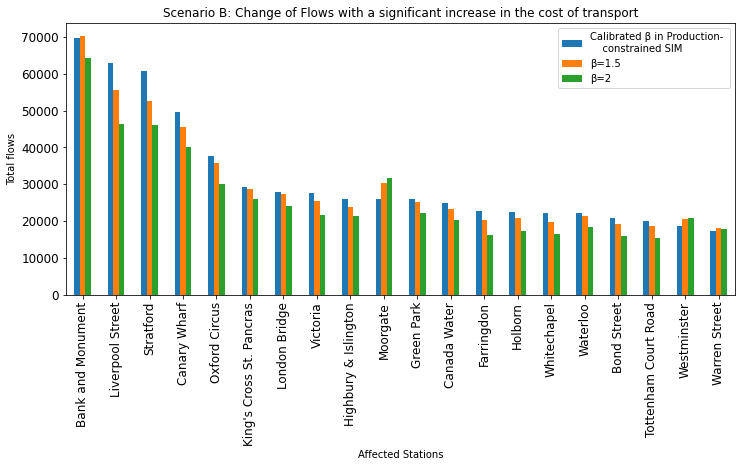

In [513]:
diffB_des_flow1.plot.bar(x='station_destination',
                        rot=90,
                        #color=[(240/255,83/255,101/255), (250/255,188/255,42/255)], # passing normalized RGB colors 
                        figsize=(12,5), # Figsize to make the plot larger
                        title='Scenario B: Change of Flows with a significant increase in the cost of transport', # Adding a title to the top
                        xlabel="Affected Stations", # Adding a label on the xaxis
                        ylabel="Total flows", # Adding a label on y axis
                        fontsize='large'); # Making my ticks a bit bigger

### IV.3.  merge

In [514]:
diffB_des_flow["diffB1"] = diffB_des_flow["prodsimest1"]-diffB_des_flow["prodsimestB1"]
diffB_des_flow["diffB2"] = diffB_des_flow["prodsimest1"]-diffB_des_flow["prodsimestB2"]

#diffB_des_flow["diffB1"] = abs(diffB_des_flow["diffB1"])
#diffB_des_flow["diffB2"] = abs(diffB_des_flow["diffB2"])

In [515]:
diffB_des_flow

,station_destination,prodsimest1,prodsimestB1,prodsimestB2,diffB1,diffB2
15,Bank and Monument,69789.0,70223.0,64237.0,-434.0,5552.0
212,Liverpool Street,62919.0,55581.0,46239.0,7338.0,16680.0
326,Stratford,60765.0,52636.0,46150.0,8129.0,14615.0
54,Canary Wharf,49645.0,45647.0,40075.0,3998.0,9570.0
251,Oxford Circus,37564.0,35778.0,30012.0,1786.0,7552.0
...,...,...,...,...,...,...
66,Cheshunt,53.0,106.0,172.0,-53.0,-119.0
136,Grange Hill,51.0,102.0,248.0,-51.0,-197.0
336,Theydon Bois,43.0,68.0,154.0,-25.0,-111.0
156,Hatch End,35.0,70.0,106.0,-35.0,-71.0


In [516]:
diffB_des_flow2 = pd.DataFrame(diffB_des_flow, columns=['station_destination', 'diffB1', 'diffB2'])
diffB_des_flow2

,station_destination,diffB1,diffB2
15,Bank and Monument,-434.0,5552.0
212,Liverpool Street,7338.0,16680.0
326,Stratford,8129.0,14615.0
54,Canary Wharf,3998.0,9570.0
251,Oxford Circus,1786.0,7552.0
...,...,...,...
66,Cheshunt,-53.0,-119.0
136,Grange Hill,-51.0,-197.0
336,Theydon Bois,-25.0,-111.0
156,Hatch End,-35.0,-71.0


In [517]:
diffA = pd.DataFrame(cdata, columns=['station_origin', 'station_destination', 'prodsimest1', 'prodsimest4'])
diffA["diffA"] = diff["prodsimest4"]-diff["prodsimest1"]

In [518]:
diffA

,station_origin,station_destination,prodsimest1,prodsimest4,diffA
0,Abbey Road,Beckton,1.0,1.0,0.0
1,Abbey Road,Blackwall,4.0,4.0,0.0
2,Abbey Road,Canary Wharf,76.0,48.0,-28.0
3,Abbey Road,Canning Town,56.0,59.0,3.0
4,Abbey Road,Crossharbour,4.0,4.0,0.0
...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,132.0,141.0,9.0
43941,Woolwich Arsenal,West Ham,269.0,289.0,20.0
43942,Woolwich Arsenal,West India Quay,37.0,40.0,3.0
43943,Woolwich Arsenal,West Silvertown,106.0,114.0,8.0


In [519]:
diffA_flow = diffA.groupby(['station_destination'])[['diffA']].sum()
diffA_flow.reset_index(level=0, inplace=True)

diffA_flow.sort_values(by=["diffA"],ascending= False, inplace = True)

In [520]:
diffA_flow

,station_destination,diffA
15,Bank and Monument,1560.0
326,Stratford,1185.0
55,Canning Town,664.0
212,Liverpool Street,443.0
251,Oxford Circus,349.0
...,...,...
156,Hatch End,0.0
245,Norwood Junction,0.0
105,Eastcote,0.0
301,South Hampstead,0.0


In [521]:
diffB_des_flow2

,station_destination,diffB1,diffB2
15,Bank and Monument,-434.0,5552.0
212,Liverpool Street,7338.0,16680.0
326,Stratford,8129.0,14615.0
54,Canary Wharf,3998.0,9570.0
251,Oxford Circus,1786.0,7552.0
...,...,...,...
66,Cheshunt,-53.0,-119.0
136,Grange Hill,-51.0,-197.0
336,Theydon Bois,-25.0,-111.0
156,Hatch End,-35.0,-71.0


In [522]:
# Join data
scenario3 = pd.merge(diffA_flow, diffB_des_flow2, left_on='station_destination', right_on='station_destination', how='inner')
#to_drop = ['Entity']
scenario3

#coefs, left_on="OrigCode", right_on="coef", how = "left"

,station_destination,diffA,diffB1,diffB2
0,Bank and Monument,1560.0,-434.0,5552.0
1,Stratford,1185.0,8129.0,14615.0
2,Canning Town,664.0,225.0,925.0
3,Liverpool Street,443.0,7338.0,16680.0
4,Oxford Circus,349.0,1786.0,7552.0
...,...,...,...,...
393,Hatch End,0.0,-35.0,-71.0
394,Norwood Junction,0.0,-113.0,-251.0
395,Eastcote,0.0,-178.0,-480.0
396,South Hampstead,0.0,-23.0,-45.0


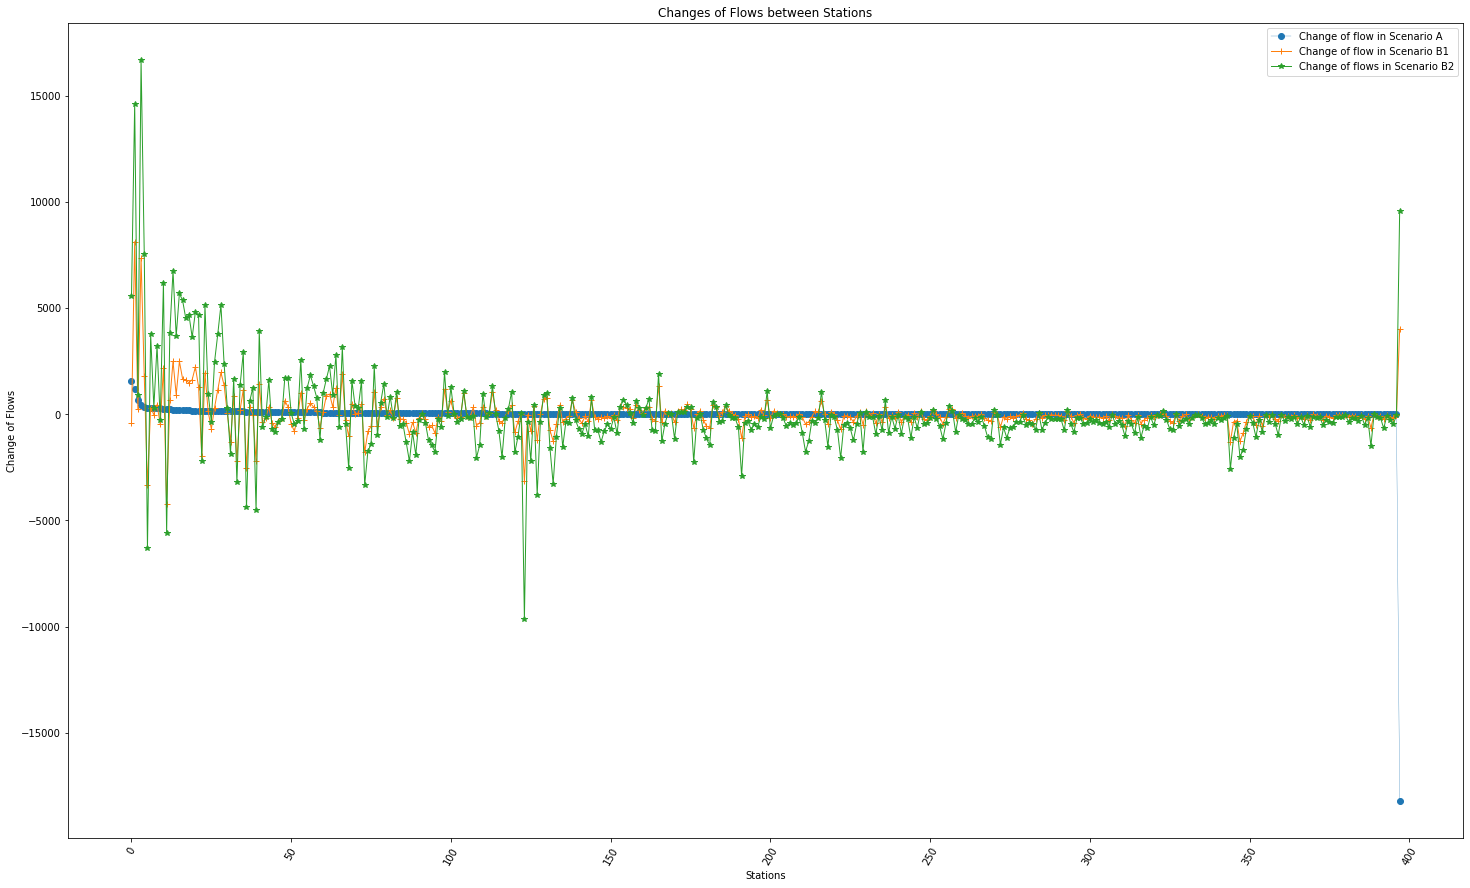

In [523]:
import matplotlib.pyplot as plt

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[25, 15])

ax.plot(scenario3['diffA'],
        marker='o', linewidth=0.3, label='Change of flow in Scenario A')
ax.plot(scenario3['diffB1'],
        marker='+', linewidth=1, 
        label='Change of flow in Scenario B1')
ax.plot(scenario3['diffB2'],
        marker='*', linewidth=1,
        label='Change of flows in Scenario B2')
plt.xticks(rotation=60)
ax.set_xlabel('Stations')
ax.set_ylabel('Change of Flows')
ax.set_title('Changes of Flows between Stations')
plt.legend()
plt.show()